# Online Shoppers Purchasing Intention

In [10]:
import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm 
import xgboost
import imblearn

In [11]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, roc_curve,precision_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from scipy.special import ndtri
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#### Importing the dataset

In [3]:
path = os.path.join('Resources', 'online_shoppers_intention.csv')

In [4]:
OSHIdf = pd.read_csv(path)

In [5]:
OSHIdf.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

#####  <B> Getting to know the data <B> 

In [6]:

OSHIdf.shape

(12330, 18)

In [7]:
OSHIdf.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
OSHIdf.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [9]:
OSHIdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

##### <B> Data Summary <B> 

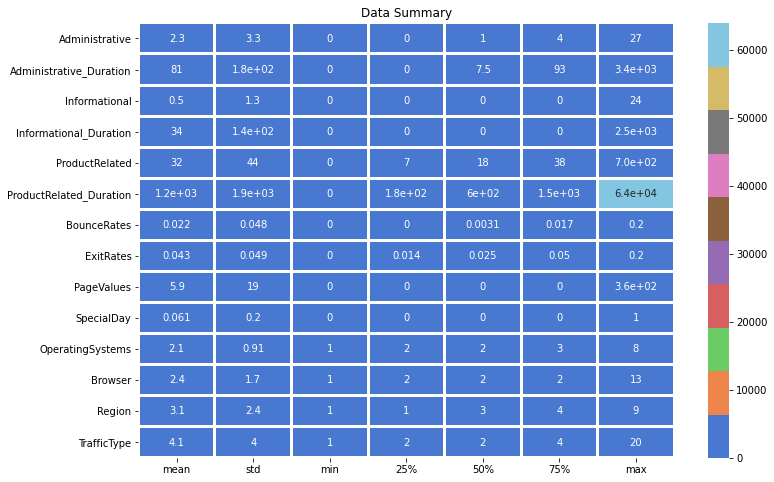

In [10]:

plt.figure(figsize = (12,8))
sns.heatmap(OSHIdf.describe()[1:].transpose(),
            annot=True,linecolor = "w",
            linewidth=2, cmap=sns.color_palette("muted"))
plt.title("Data Summary")
plt.show()

### <B> Detecting missing values<B> 

In [11]:
OSHIdf.isna().sum().sum()

0

In [12]:
OSHIdf.isnull().sum().sum()

0

# Initial Analysis 

### Univarialte Analysis 

#### Checking the ditribution of numeric features 

Text(0, 0.5, 'Count of Users')

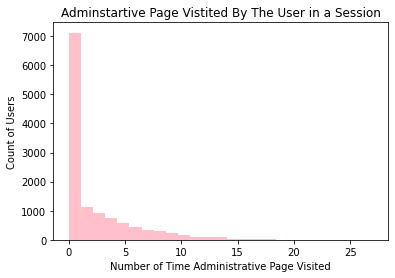

In [13]:
#Administrative 
hist_plot_Administartive = OSHIdf['Administrative'].hist(bins = 25, grid = False, color = "pink")
hist_plot_Administartive.set_title('Adminstartive Page Vistited By The User in a Session')
hist_plot_Administartive.set_xlabel('Number of Time Administrative Page Visited')
hist_plot_Administartive.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

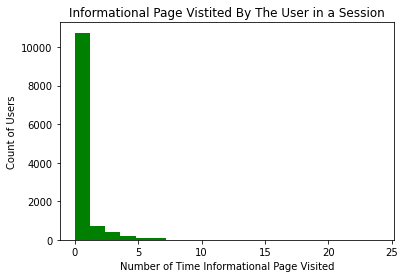

In [14]:
#Informational
hist_plot_Informational = OSHIdf['Informational'].hist(bins = 20, grid = False, color = "green")
hist_plot_Informational.set_title('Informational Page Vistited By The User in a Session')
hist_plot_Informational.set_xlabel('Number of Time Informational Page Visited')
hist_plot_Informational.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

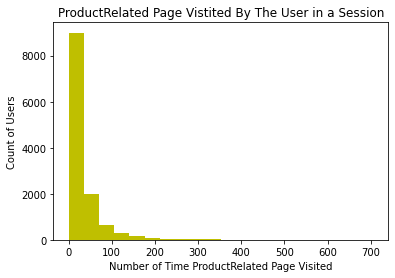

In [15]:
#ProductRelated
hist_plot_ProductRelated = OSHIdf['ProductRelated'].hist(bins = 20, grid = False, color = "y")
hist_plot_ProductRelated.set_title('ProductRelated Page Vistited By The User in a Session')
hist_plot_ProductRelated.set_xlabel('Number of Time ProductRelated Page Visited')
hist_plot_ProductRelated.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

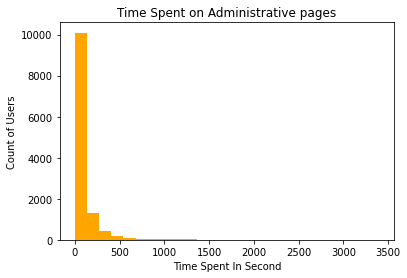

In [16]:
#Administrative_Duration
hist_plot_Administrative_Duration = OSHIdf['Administrative_Duration'].hist(bins = 25, grid = False, color = "orange")
hist_plot_Administrative_Duration.set_title('Time Spent on Administrative pages')
hist_plot_Administrative_Duration.set_xlabel('Time Spent In Second')
hist_plot_Administrative_Duration.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

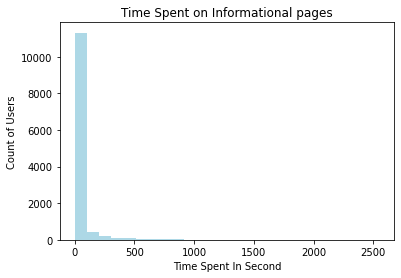

In [17]:
#Informational_Duration'
hist_plot_Informational_Duration = OSHIdf['Informational_Duration'].hist(bins = 25, grid = False, color = "lightblue")
hist_plot_Informational_Duration.set_title('Time Spent on Informational pages')
hist_plot_Informational_Duration.set_xlabel('Time Spent In Second')
hist_plot_Informational_Duration.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

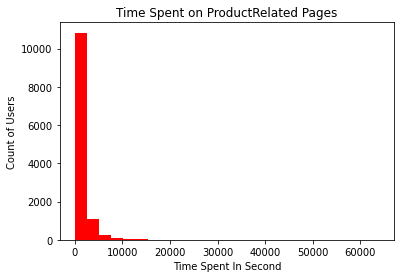

In [18]:
#ProductRelated_Duration
hist_plot_ProductRelated_Duration = OSHIdf['ProductRelated_Duration'].hist(bins = 25, grid = False, color = "r")
hist_plot_ProductRelated_Duration.set_title('Time Spent on ProductRelated Pages')
hist_plot_ProductRelated_Duration.set_xlabel('Time Spent In Second')
hist_plot_ProductRelated_Duration.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

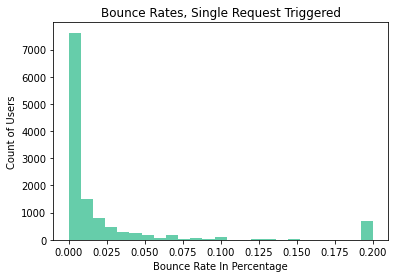

In [19]:
#BounceRates
hist_plot_BounceRates = OSHIdf['BounceRates'].hist(bins = 25, grid = False, color = "mediumaquamarine")
hist_plot_BounceRates.set_title('Bounce Rates, Single Request Triggered')
hist_plot_BounceRates.set_xlabel('Bounce Rate In Percentage')
hist_plot_BounceRates.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

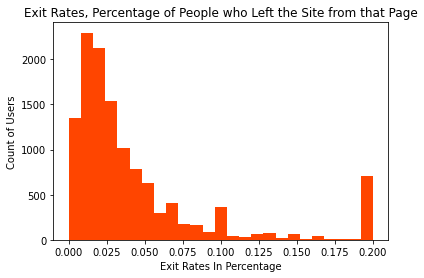

In [20]:
#Exit Rates
hist_plot_ExitRates = OSHIdf['ExitRates'].hist(bins = 25, grid = False, color = "orangered")
hist_plot_ExitRates.set_title('Exit Rates, Percentage of People who Left the Site from that Page')
hist_plot_ExitRates.set_xlabel('Exit Rates In Percentage')
hist_plot_ExitRates.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

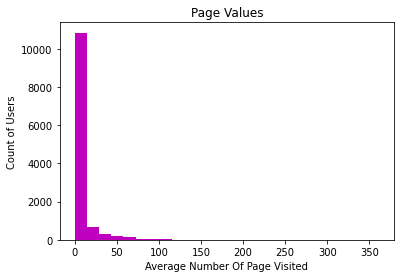

In [21]:
#Page Values
hist_plot_PageValues = OSHIdf['PageValues'].hist(bins = 25, grid = False, color = "m")
hist_plot_PageValues.set_title('Page Values')
hist_plot_PageValues.set_xlabel('Average Number Of Page Visited')
hist_plot_PageValues.set_ylabel('Count of Users')

In [22]:
OSHIdf['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

Text(0, 0.5, 'Count of SpecialDay')

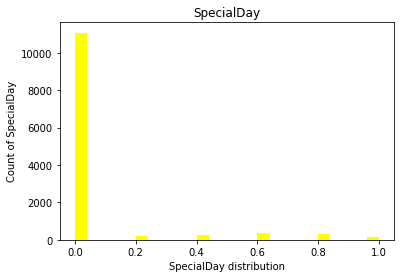

In [23]:
#Page Values
hist_plot_SpecialDay = OSHIdf['SpecialDay'].hist(bins = 25, grid = False, color = "yellow")
hist_plot_SpecialDay.set_title('SpecialDay')
hist_plot_SpecialDay.set_xlabel('SpecialDay distribution')
hist_plot_SpecialDay.set_ylabel('Count of SpecialDay')

#### Frequency table and visulization of categorical variables 

In [24]:
#Operating systems 
Operatingsystems_frequency_table = pd.crosstab(index = OSHIdf["OperatingSystems"], columns = "Count")
Operatingsystems_frequency_table

col_0,Count
OperatingSystems,
1,2585
2,6601
3,2555
4,478
5,6
6,19
7,7
8,79


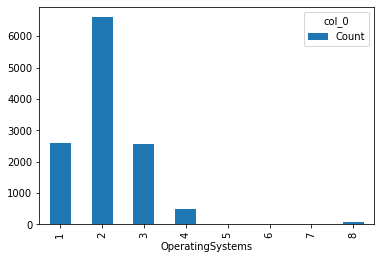

In [25]:
Operatingsystems_frequency_table.plot.bar()

In [26]:
Browser_frequency_table = pd.crosstab(index = OSHIdf["Browser"], columns = "Count")
Browser_frequency_table

col_0,Count
Browser,
1,2462
2,7961
3,105
4,736
5,467
6,174
7,49
8,135
9,1


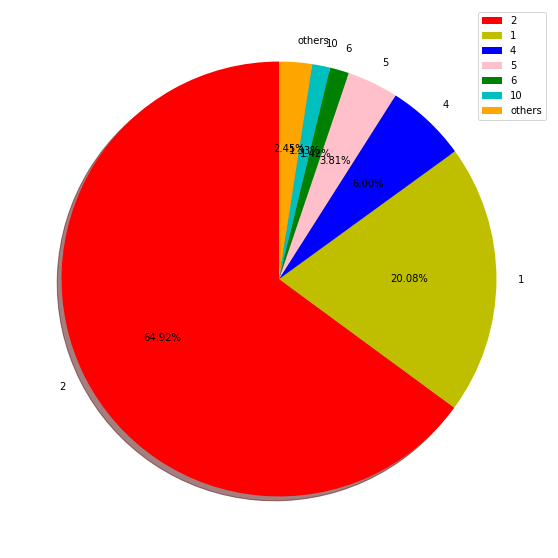

In [440]:
#Percentage of different browsers
plt.rcParams["figure.figsize"]=(25,10)
size = [7961, 2462, 736, 467, 174, 163, 300]
colors = ['r', 'y', 'b', 'pink', 'g', 'c', 'orange']
labels = "2", "1", "4", "5", "6", "10", "others"
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.axis('off')
plt.legend()
plt.show()

In [28]:
#Region
Region_frequency_table = pd.crosstab(index=OSHIdf["Region"], columns = "count")
Region_frequency_table

col_0,count
Region,
1,4780
2,1136
3,2403
4,1182
5,318
6,805
7,761
8,434
9,511


Text(0, 0.5, 'count')

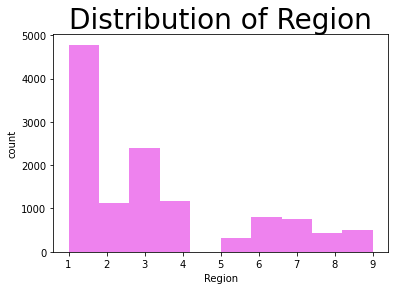

In [29]:
plt.hist(OSHIdf["Region"], color = "violet")
plt.title("Distribution of Region", fontsize = 28)
plt.xlabel("Region")
plt.ylabel("count")

In [30]:
Traffictype_frequency_table = pd.crosstab(index = OSHIdf["TrafficType"], columns = "Count")
Traffictype_frequency_table

col_0,Count
TrafficType,
1,2451
2,3913
3,2052
4,1069
5,260
6,444
7,40
8,343
9,42


Text(0, 0.5, 'count')

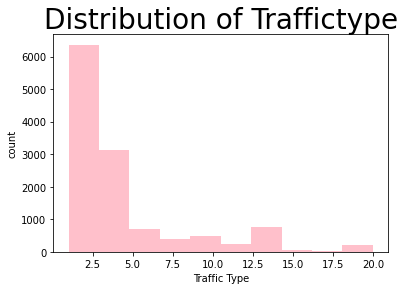

In [31]:
plt.hist(OSHIdf["TrafficType"], color = "Pink")
plt.title("Distribution of Traffictype", fontsize = 28)
plt.xlabel("Traffic Type")
plt.ylabel("count")

In [32]:
#Visitor type 
Visitortype_frequency_table = pd.crosstab(index = OSHIdf["VisitorType"], columns = "Count")
Visitortype_frequency_table

col_0,Count
VisitorType,
New_Visitor,1694
Other,85
Returning_Visitor,10551


In [33]:
Visitortype_frequency_table/Visitortype_frequency_table.sum()

col_0,Count
VisitorType,
New_Visitor,0.137388
Other,0.006894
Returning_Visitor,0.855718


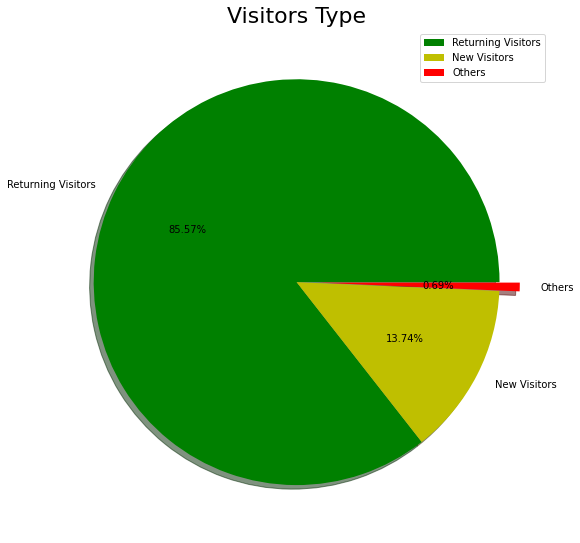

In [34]:
#Percentage of different Visitors type in the dataset
plt.rcParams["figure.figsize"] = (20, 10)
size = [10551, 1694, 85]
colors = ["g", "y", "r"]
labels = "Returning Visitors", "New Visitors", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title("Visitors Type", fontsize = 22)
plt.axis("off")
plt.legend()

In [35]:
#Weekend
pd.crosstab(index = OSHIdf["Weekend"], columns = "Count")

col_0,Count
Weekend,
False,9462
True,2868


Weekdays: 9462
weekend: 2868


<function matplotlib.pyplot.show(*args, **kw)>

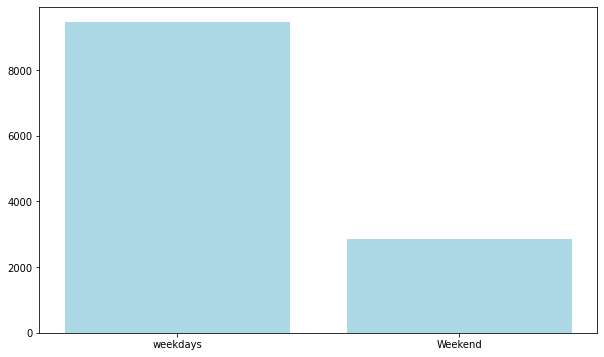

In [36]:
plt.figure(figsize =(10, 6))
print("Weekdays:", len(OSHIdf[OSHIdf.Weekend == 0]))
print("weekend:", len(OSHIdf[OSHIdf.Weekend == 1]))
y = len(OSHIdf[OSHIdf.Weekend == 0]), len(OSHIdf[OSHIdf.Weekend == 1])
x = ["weekdays", "Weekend"]
plt.bar(x, y, color = "lightblue")
plt.show

In [37]:
#Month
pd.crosstab(index = OSHIdf["Month"], columns = "Count")

col_0,Count
Month,
Aug,433
Dec,1727
Feb,184
Jul,432
June,288
Mar,1907
May,3364
Nov,2998
Oct,549


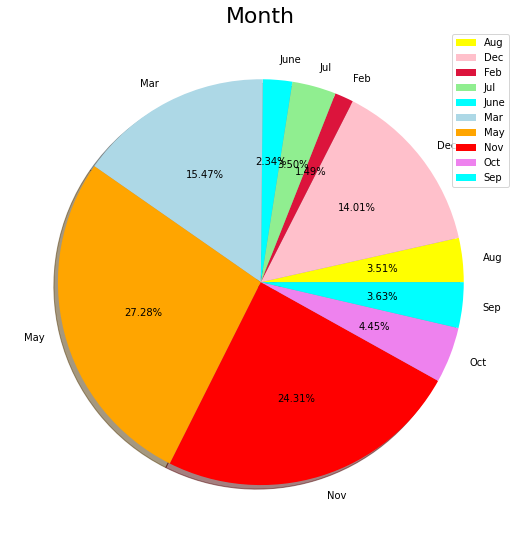

In [38]:
#Percentage of different Month in the dataset
plt.rcParams["figure.figsize"] = (20, 10)
size = [433, 1727, 184, 432, 288, 1907, 3364, 2998, 549, 448]
colors = ["yellow", "pink", "crimson", "lightgreen", "cyan", "lightblue", "orange", "red", "violet", "cyan"]
labels = "Aug", "Dec", "Feb", "Jul", "June", "Mar", "May", "Nov", "Oct", "Sep"
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels,shadow = True, autopct = '%.2f%%')
plt.title("Month", fontsize = 22)
plt.axis("off")
plt.legend()

In [39]:
#frequency table for Revenue 
pd.crosstab(index = OSHIdf["Revenue"], columns = "Count")

col_0,Count
Revenue,
False,10422
True,1908


Did not buy: 10422
Bought: 1908


<function matplotlib.pyplot.show(*args, **kw)>

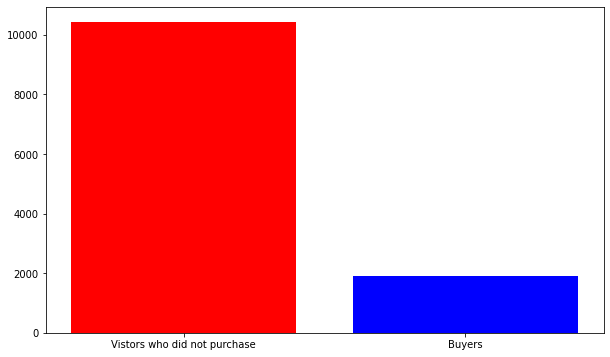

In [14]:
#Plotting the Revenue 
plt.figure(figsize =(10, 6))
print("Did not buy:", len(OSHIdf[OSHIdf.Revenue == 0]))
print("Bought:", len(OSHIdf[OSHIdf.Revenue == 1]))
y = len(OSHIdf[OSHIdf.Revenue == 0]), len(OSHIdf[OSHIdf.Revenue == 1])
x = ["Vistors who did not purchase", "Buyers"]
colors = ["red", "Blue"]
plt.bar(x, y, color = colors)
plt.show 

### Bivariate Analysis 

In [41]:
OSHIdf.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

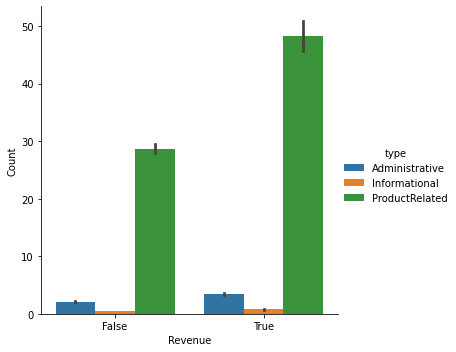

In [46]:
OSHIdf2 = pd.melt(OSHIdf[['Administrative','Informational','ProductRelated','Revenue']], id_vars='Revenue', var_name='type', value_name = 'Count')
OSHIdf2
sns.factorplot(x='Revenue', y='Count',hue ='type', data = OSHIdf2, kind ='bar')

Text(0, 0.5, 'Revenue')

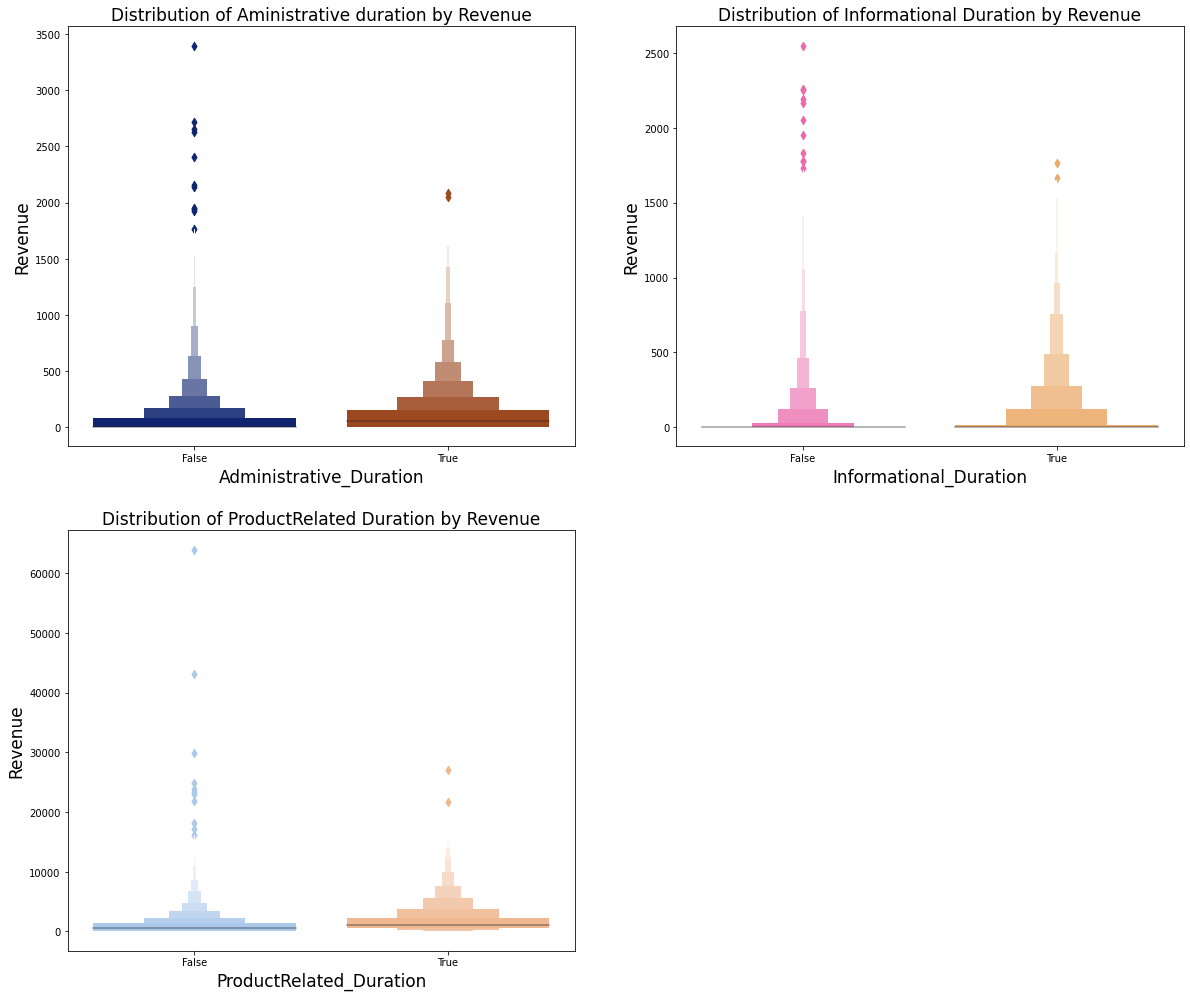

In [47]:
plt.rcParams['figure.figsize'] = (20, 17)

#Distribution of Administrative duration by Revenue 
plt.subplot(2, 2, 1)
sns.boxenplot(OSHIdf['Revenue'], OSHIdf['Administrative_Duration'], palette = 'dark')
plt.title('Distribution of Aministrative duration by Revenue', fontsize = 17)
plt.xlabel('Administrative_Duration', fontsize = 17)
plt.ylabel('Revenue', fontsize = 17)

#Distribution of Informational duration by Revenue 
plt.subplot(2, 2, 2)
sns.boxenplot(OSHIdf['Revenue'], OSHIdf['Informational_Duration'], palette = 'spring')
plt.title('Distribution of Informational Duration by Revenue', fontsize = 17)
plt.xlabel('Informational_Duration', fontsize = 17)
plt.ylabel('Revenue', fontsize = 17)

#Distribution of ProductRelated pages by Revenue
plt.subplot(2, 2, 3)
sns.boxenplot(OSHIdf['Revenue'], OSHIdf['ProductRelated_Duration'], palette = 'pastel')
plt.title('Distribution of ProductRelated Duration by Revenue', fontsize = 17)
plt.xlabel('ProductRelated_Duration', fontsize = 17)
plt.ylabel('Revenue', fontsize = 17)


Text(0, 0.5, 'Revenue')

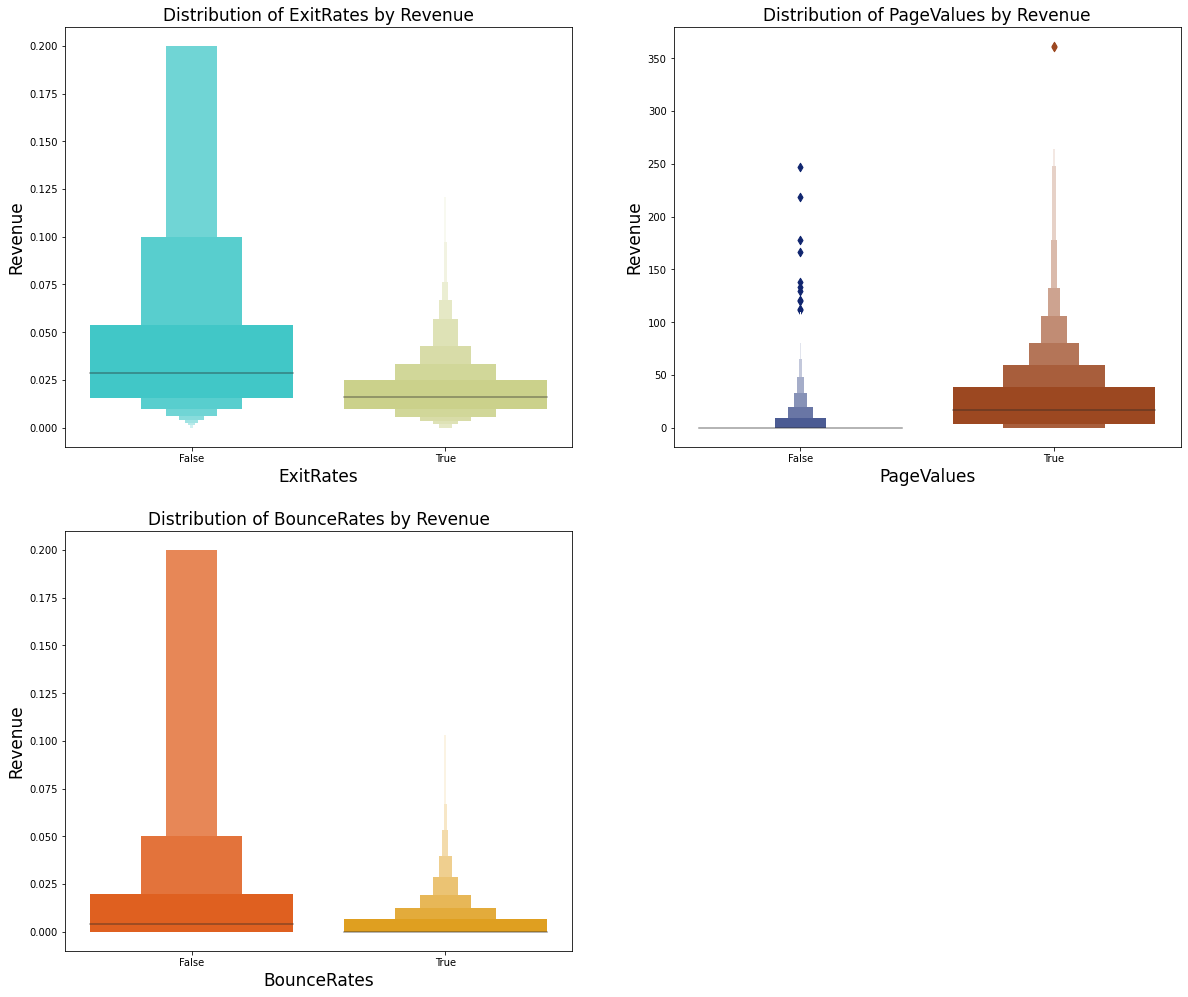

In [48]:
#Distribution of ExitRates by Revenue 
plt.subplot(2, 2, 1)
sns.boxenplot(OSHIdf['Revenue'], OSHIdf['ExitRates'], palette = 'rainbow')
plt.title('Distribution of ExitRates by Revenue', fontsize = 17)
plt.xlabel('ExitRates', fontsize = 17)
plt.ylabel('Revenue', fontsize = 17)

#Distribution of PageValues by Revenue 
plt.subplot(2, 2,2)
sns.boxenplot(OSHIdf['Revenue'], OSHIdf['PageValues'], palette = 'dark')
plt.title('Distribution of PageValues by Revenue', fontsize = 17)
plt.xlabel('PageValues', fontsize = 17)
plt.ylabel('Revenue', fontsize = 17)

#Distribution of BounceRates by Revenue
plt.subplot(2, 2, 3)
sns.boxenplot(OSHIdf['Revenue'], OSHIdf['BounceRates'], palette = 'autumn')
plt.title('Distribution of BounceRates by Revenue', fontsize = 17)
plt.xlabel('BounceRates', fontsize = 17)
plt.ylabel('Revenue', fontsize = 17)

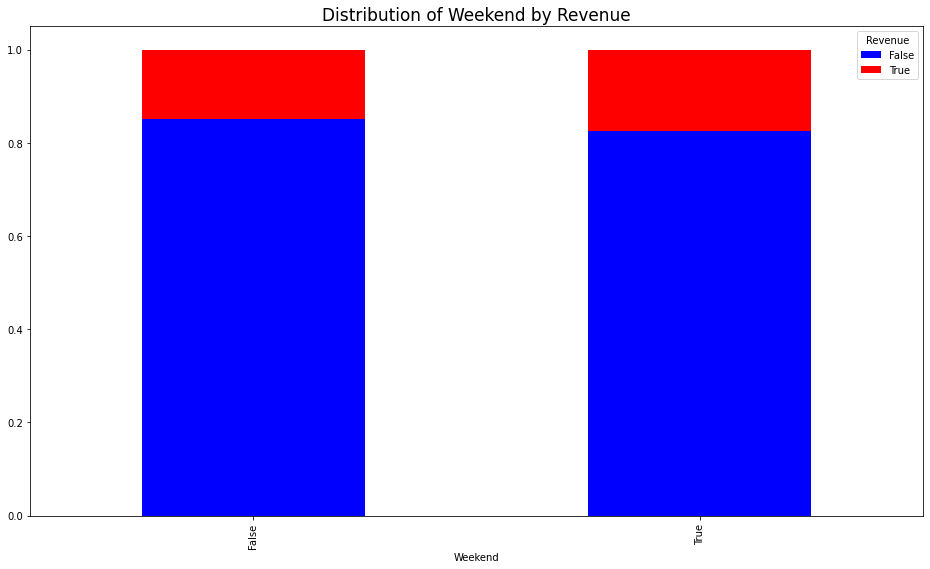

In [52]:
#Distribution of Weekend by Revenue
OSHIdf = pd.crosstab(OSHIdf['Weekend'], OSHIdf['Revenue'])
OSHIdf.div(OSHIdf.sum(1).astype(float), axis =0).plot(kind = 'bar', stacked = True, figsize = (16, 9), color = ['blue', 'red'])
plt.title('Distribution of Weekend by Revenue', fontsize = 17)
plt.show()

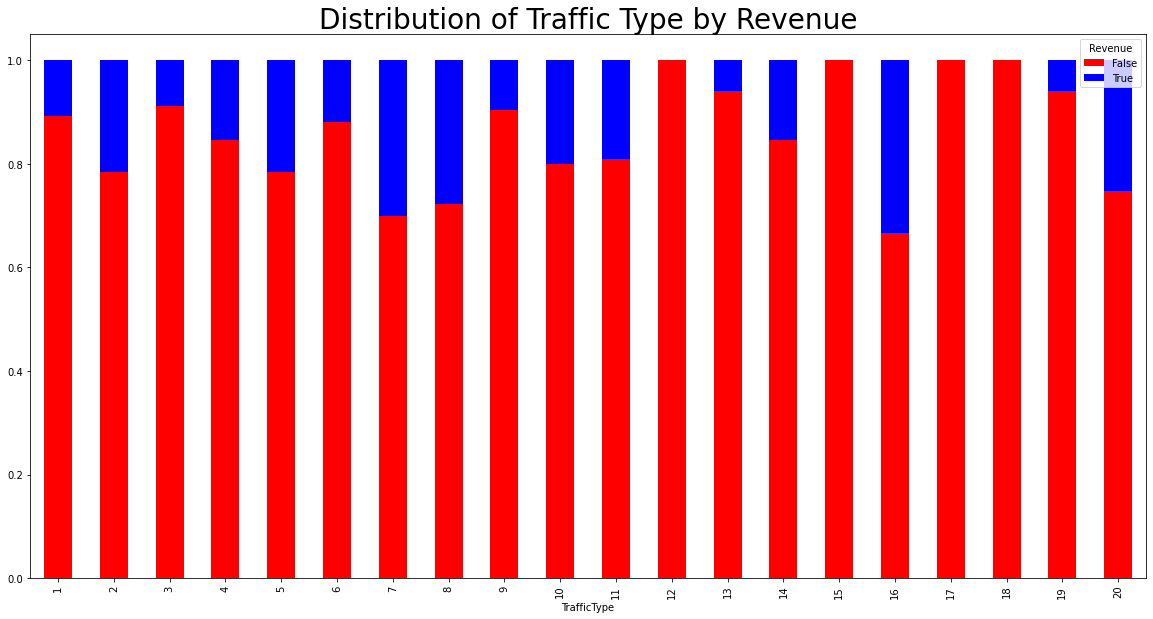

In [54]:
#distribution of TrafficType by revenue 
OSHIdf = pd.crosstab(OSHIdf['TrafficType'], OSHIdf['Revenue'])
OSHIdf.div(OSHIdf.sum(1).astype(float), axis =0).plot(kind = 'bar', stacked = True, figsize = (20, 10), color = ['red', 'blue'])
plt.title('Distribution of Traffic Type by Revenue', fontsize = 28)
plt.show()

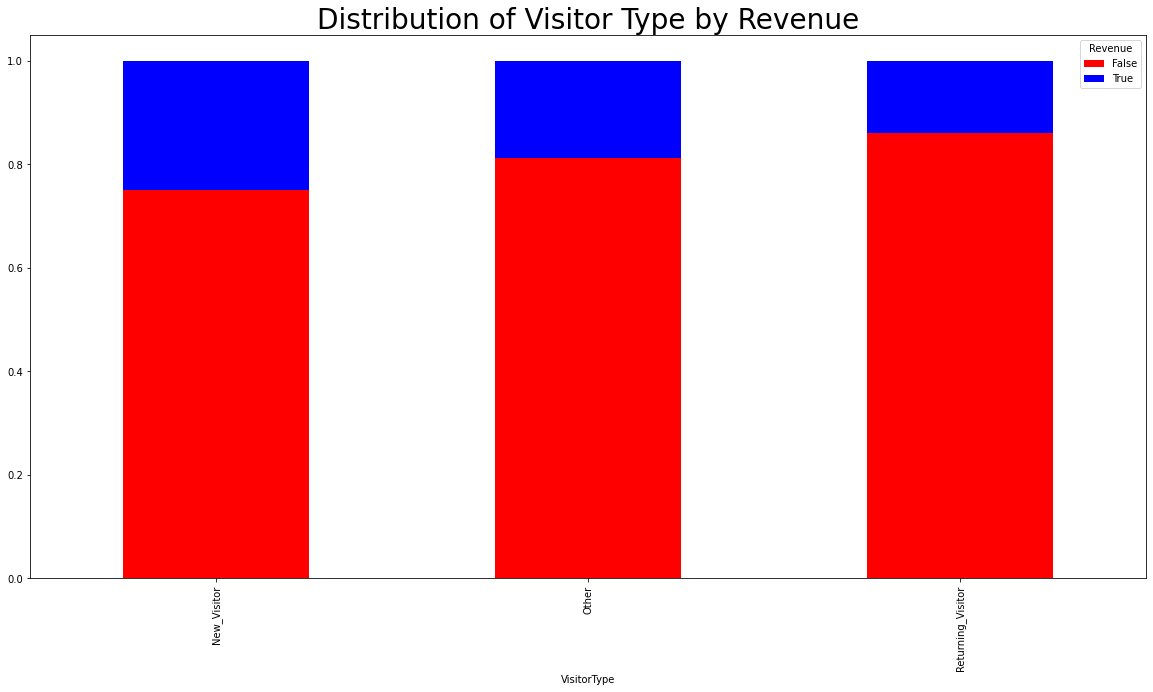

In [56]:
#distribution of VisitorType by revenue 
OSHIdf = pd.crosstab(OSHIdf['VisitorType'], OSHIdf['Revenue'])
OSHIdf.div(OSHIdf.sum(1).astype(float), axis =0).plot(kind = 'bar', stacked = True, figsize = (20, 10), color = ['red', 'blue'])
plt.title('Distribution of Visitor Type by Revenue', fontsize = 28)
plt.show()

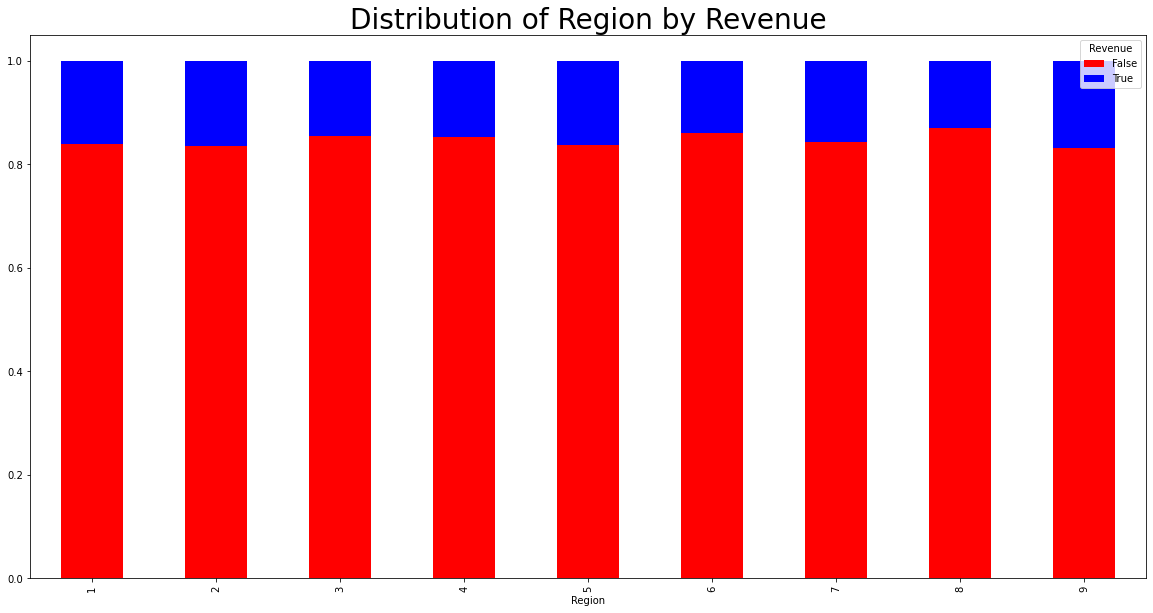

In [58]:
#Distribution of Region by Revenue
OSHIdf = pd.crosstab(OSHIdf['Region'], OSHIdf['Revenue'])
OSHIdf.div(OSHIdf.sum(1).astype(float), axis =0).plot(kind = 'bar', stacked = True, figsize = (20, 10), color = ['red', 'blue'])
plt.title('Distribution of Region by Revenue', fontsize = 28)
plt.show()

In [59]:
path = os.path.join('Resources', 'online_shoppers_intention.csv')
OSHIdf = pd.read_csv(path)

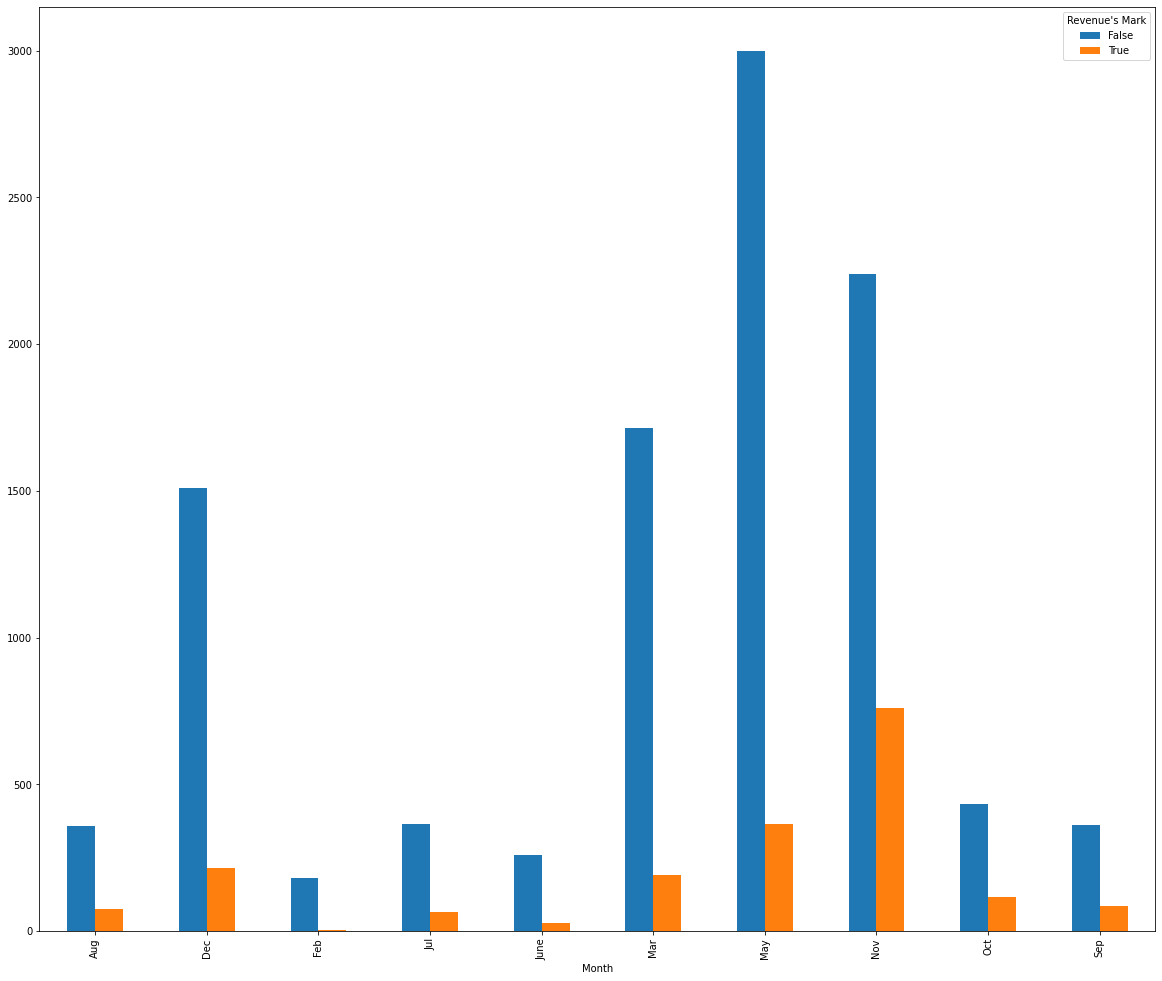

In [61]:
#Distribution of Month by Revenue
ctMvR = pd.crosstab(OSHIdf.Month, OSHIdf.Revenue)
ctMvR.plot.bar()
plt.legend(title = "Revenue's Mark" )path = os.path.join('Resources', 'online_shoppers_intention.csv')
OSHIdf = pd.read_csv(path)

# Multivariate Analysis 

Text(0.5, 1.0, 'Month vs BounceRates wrt to Reveneue')

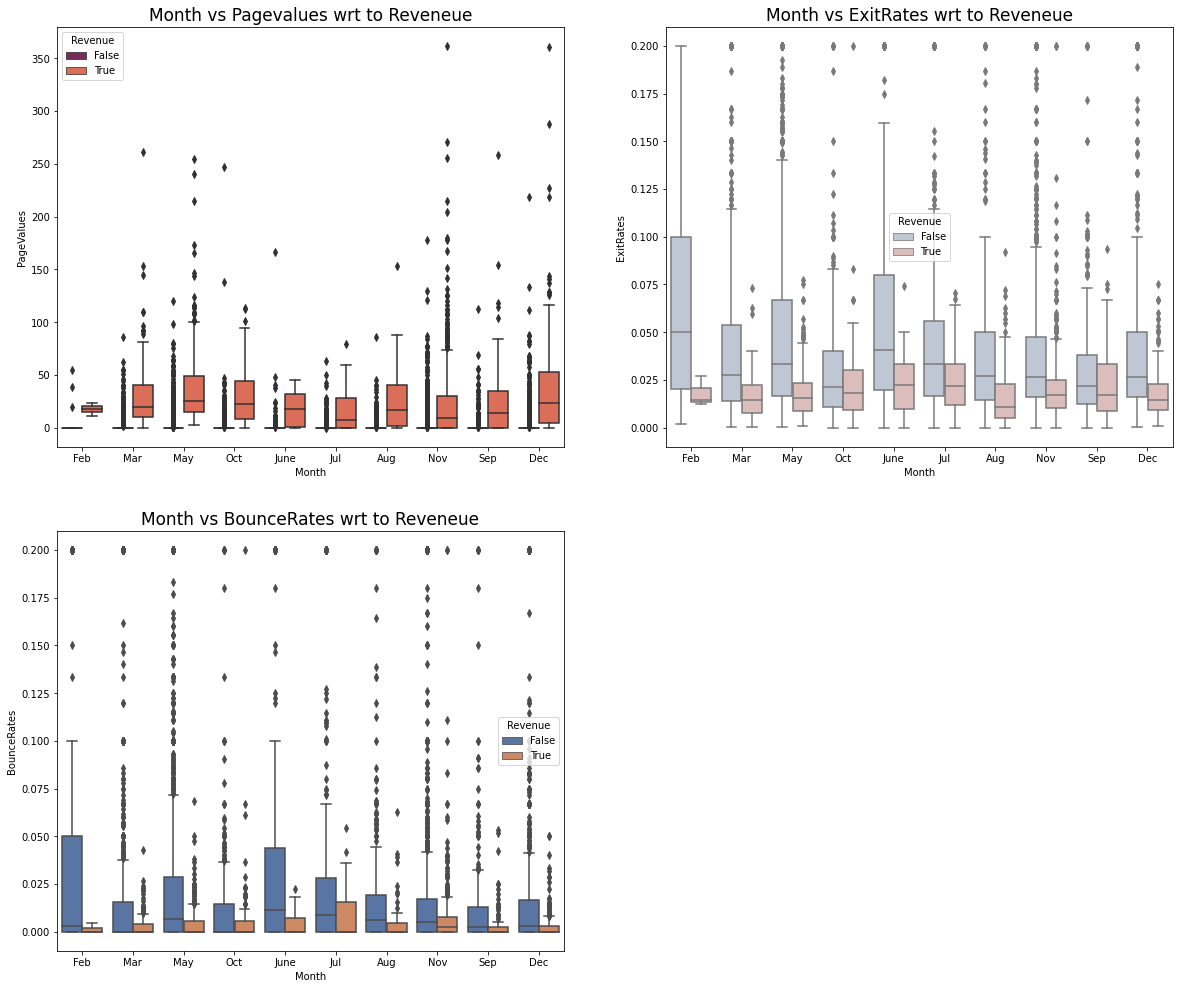

In [72]:
#Month vs pagevalues wrt revenue 

plt.subplot(2, 2, 1)
sns.boxplot(x = OSHIdf['Month'], y = OSHIdf['PageValues'], hue =OSHIdf['Revenue'], palette = 'rocket')
plt.title('Month vs Pagevalues wrt to Reveneue', fontsize =17)

#Month vs Exitrates wrt revenue 

plt.subplot(2, 2, 2)
sns.boxplot(x = OSHIdf['Month'], y = OSHIdf['ExitRates'], hue=OSHIdf['Revenue'], palette = 'vlag')
plt.title('Month vs ExitRates wrt to Reveneue', fontsize =17)

#Month vs BounceRates wrt revenue 

plt.subplot(2, 2, 3)
sns.boxplot(x = OSHIdf['Month'], y = OSHIdf['BounceRates'], hue=OSHIdf['Revenue'], palette = 'deep')
plt.title('Month vs BounceRates wrt to Reveneue', fontsize =17)

Text(0.5, 1.0, 'VisitorType vs BounceRates wrt to Reveneue')

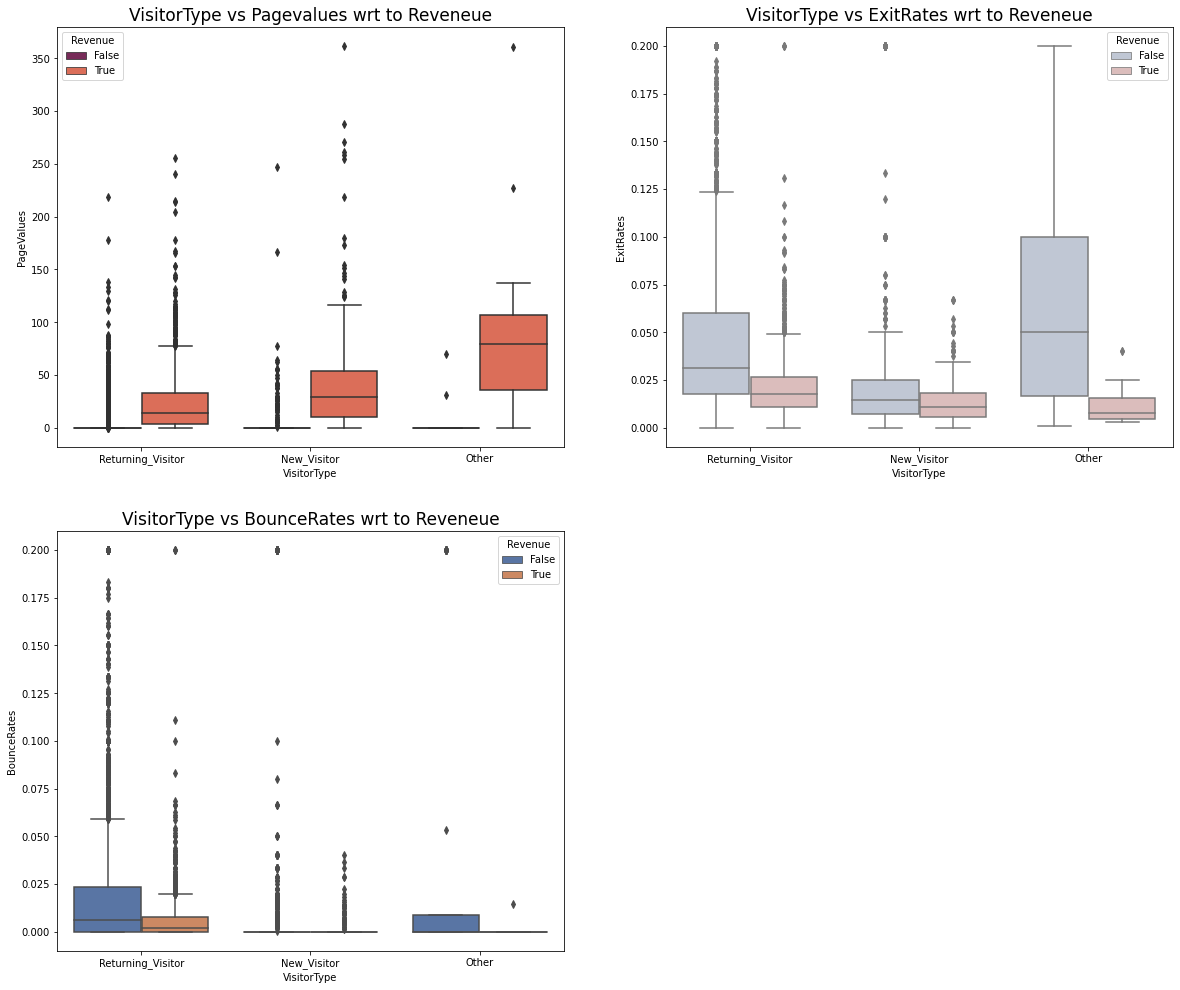

In [73]:
#VisitorType vs pagevalues wrt revenue 

plt.subplot(2, 2, 1)
sns.boxplot(x = OSHIdf['VisitorType'], y = OSHIdf['PageValues'], hue =OSHIdf['Revenue'], palette = 'rocket')
plt.title('VisitorType vs Pagevalues wrt to Reveneue', fontsize =17)

#VisitorType vs Exitrates wrt revenue 

plt.subplot(2, 2, 2)
sns.boxplot(x = OSHIdf['VisitorType'], y = OSHIdf['ExitRates'], hue=OSHIdf['Revenue'], palette = 'vlag')
plt.title('VisitorType vs ExitRates wrt to Reveneue', fontsize =17)

#VisitorType vs BounceRates wrt revenue 

plt.subplot(2, 2, 3)
sns.boxplot(x = OSHIdf['VisitorType'], y = OSHIdf['BounceRates'], hue=OSHIdf['Revenue'], palette = 'deep')
plt.title('VisitorType vs BounceRates wrt to Reveneue', fontsize =17)

Text(0.5, 1.0, 'Region vs BounceRates wrt to Reveneue')

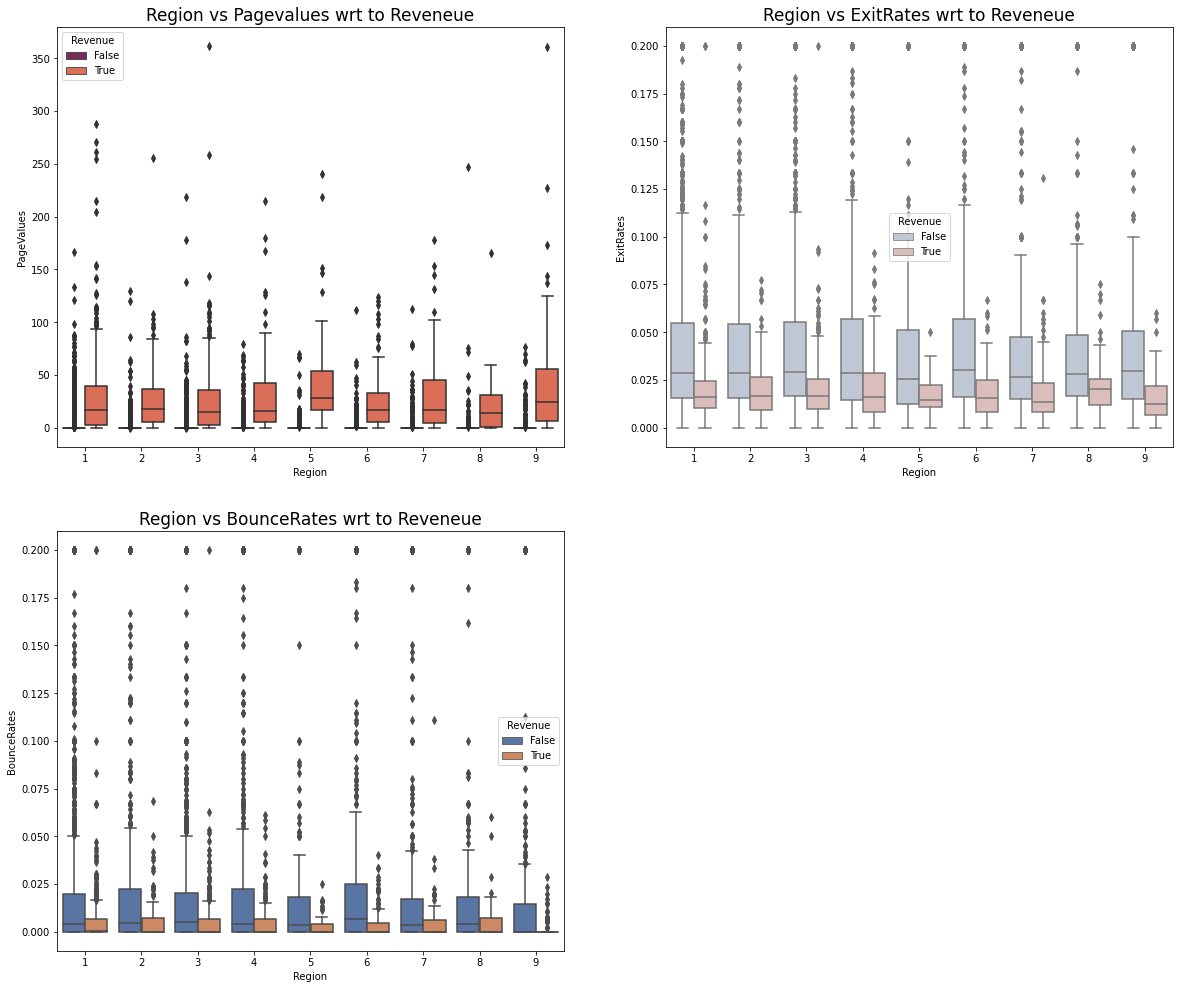

In [74]:
#Region vs pagevalues wrt revenue 

plt.subplot(2, 2, 1)
sns.boxplot(x = OSHIdf['Region'], y = OSHIdf['PageValues'], hue =OSHIdf['Revenue'], palette = 'rocket')
plt.title('Region vs Pagevalues wrt to Reveneue', fontsize =17)

#Region vs Exitrates wrt revenue 

plt.subplot(2, 2, 2)
sns.boxplot(x = OSHIdf['Region'], y = OSHIdf['ExitRates'], hue=OSHIdf['Revenue'], palette = 'vlag')
plt.title('Region vs ExitRates wrt to Reveneue', fontsize =17)

#Region vs BounceRates wrt revenue 

plt.subplot(2, 2, 3)
sns.boxplot(x = OSHIdf['Region'], y = OSHIdf['BounceRates'], hue=OSHIdf['Revenue'], palette = 'deep')
plt.title('Region vs BounceRates wrt to Reveneue', fontsize =17)

In [75]:
# Normalization 

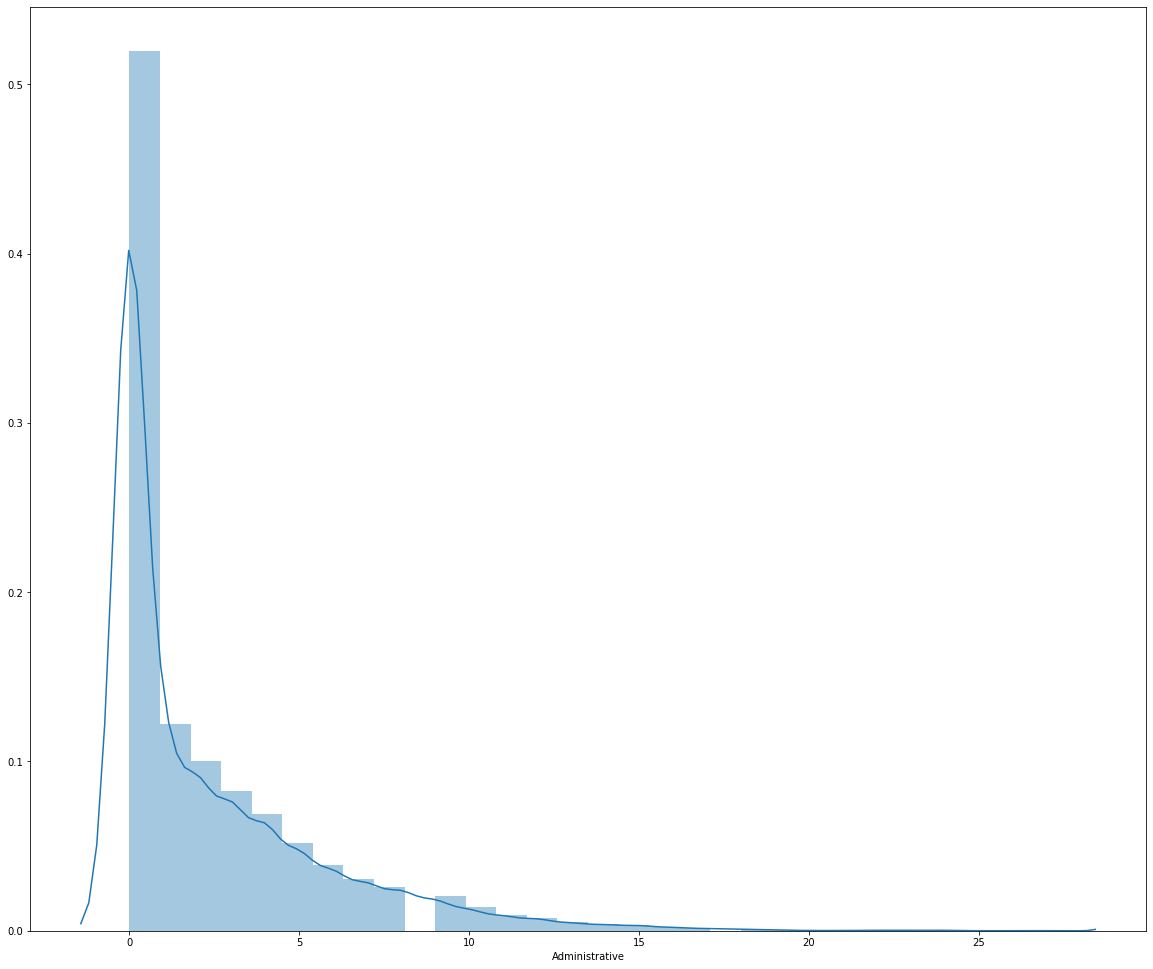

In [76]:
#Administrative 
sns.distplot(OSHIdf['Administrative'], bins = 30)

In [77]:
sorted_Administrative = np.sort(OSHIdf["Administrative"], axis = 0)
scaled_Administrative = (sorted_Administrative - sorted_Administrative.mean())/sorted_Administrative.std()
scaled_Administrative =np.reshape(scaled_Administrative , (12330,))
#Generating some normal data in order to compare it with the actual distribution 
normal_Administrative_numbers = np.random.normal(loc = 0, scale = 1, size = np.size(scaled_Administrative))
normal_Administrative_numbers = np.sort(normal_Administrative_numbers)

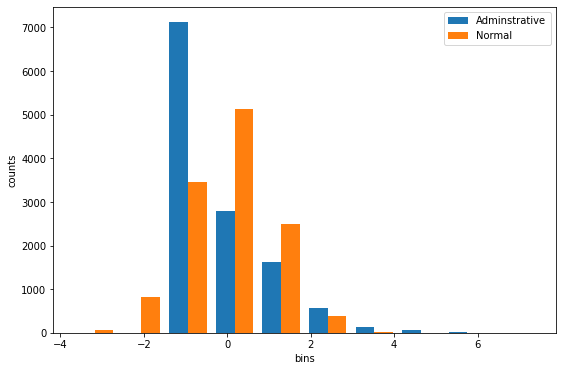

In [78]:
#plot a histogram to see how the actual distribution is close to normal distribution
plt.figure(figsize=(9, 6))
plt.hist([scaled_Administrative,normal_Administrative_numbers], label = ["Adminstrative", "Normal"])
plt.xlabel('bins')
plt.ylabel('counts')
plt.legend(loc= 'best')
ax = plt.gca()

ax.grid(False)

In [79]:
stats.kstest(scaled_Administrative, 'norm')
#We should reject null hypothesis

KstestResult(statistic=0.24290359849872983, pvalue=0.0)

###  Matrix of features and the dependent variable vector

In [16]:
#In python we need to distinguish between the matrix of features(Independent variables) and the dependent variable vector
OSHIX = OSHIdf.iloc[:,:-1]
OSHIX.shape

(12330, 17)

In [17]:
OSHIy = OSHIdf.iloc[:, 17:18]
OSHIy.shape

(12330, 1)

### Handling categorical features/creating dummy or indicator variables 

In [18]:
OSHIX_n = pd.get_dummies(OSHIX, drop_first = True)

In [19]:
OSHIX.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [20]:
OSHIX_n.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [21]:
OSHIX_n.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [22]:
le_weekend = LabelEncoder()
OSHIX_n['Weekend_n'] = le_weekend.fit_transform(OSHIX_n['Weekend'])

In [23]:
OSHIX_n.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_n'],
      dtype='object')

In [24]:
# drop weekend column 
OSHIX_n = OSHIX_n.drop(['Weekend'], axis = 'columns')

In [25]:
OSHIX_n.shape

(12330, 26)

In [26]:
OSHIX_n.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_n'],
      dtype='object')

In [27]:
print(OSHIX_n.dtypes)

Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
Month_Dec                          uint8
Month_Feb                          uint8
Month_Jul                          uint8
Month_June                         uint8
Month_Mar                          uint8
Month_May                          uint8
Month_Nov                          uint8
Month_Oct                          uint8
Month_Sep                          uint8
VisitorType_Other                  uint8
VisitorType_Retu

#### <B> Encoding the dependent variable <B> 

In [28]:
OSHIdf.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [29]:
OSHIy.shape

(12330, 1)

In [30]:
le_weekend = LabelEncoder()
OSHIy['Revenue'] = le_weekend.fit_transform(OSHIy['Revenue'])
OSHIy.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [31]:
print("shape of matrix of features:", OSHIX_n.shape)
print("shape of dependent variable vector:", OSHIy.shape)

shape of matrix of features: (12330, 26)
shape of dependent variable vector: (12330, 1)


### Correlation Matrix 

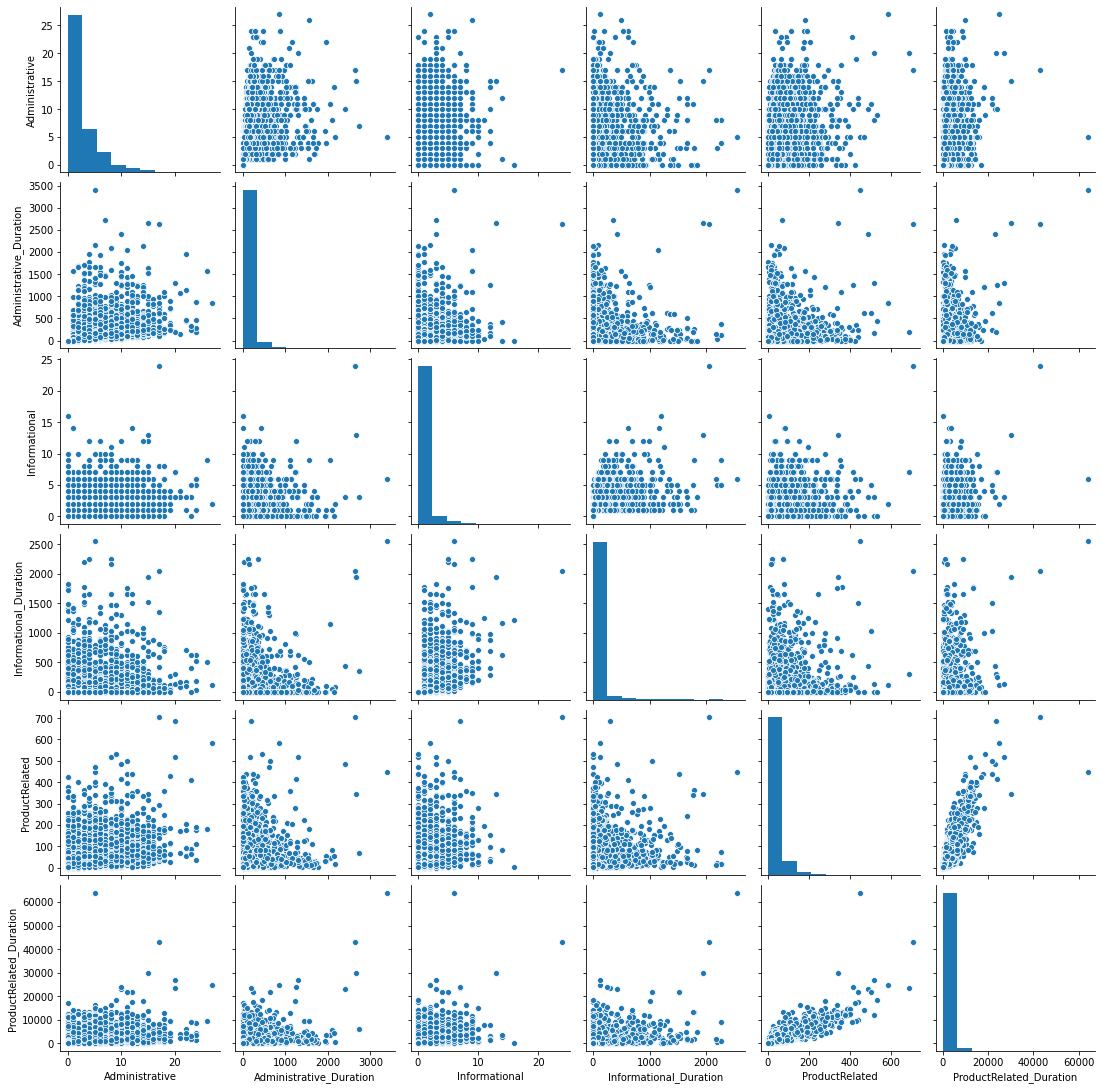

In [9]:
z = OSHIdf[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']]
g = sns.pairplot(z)

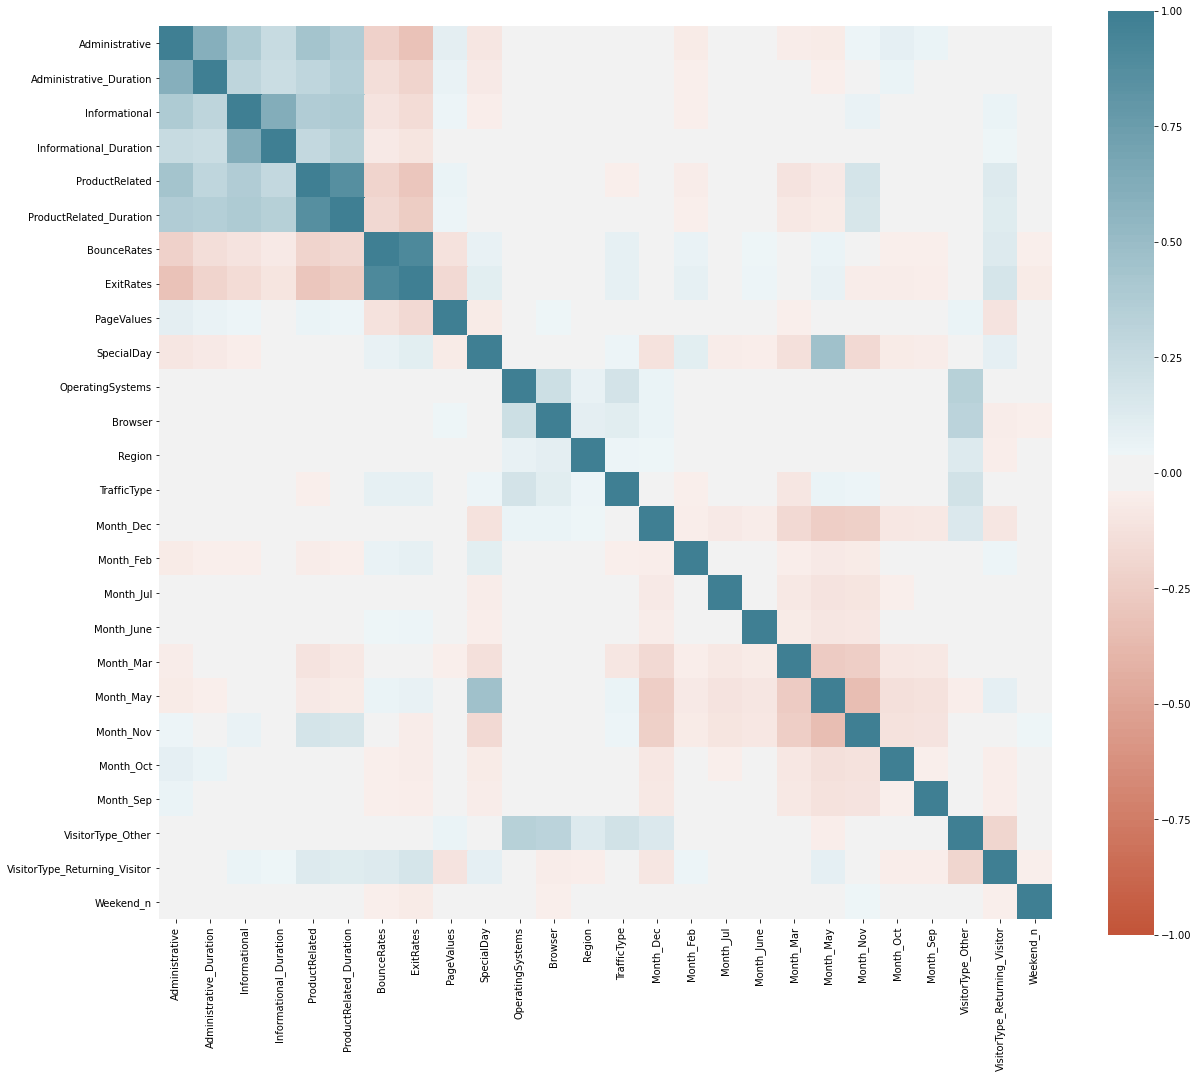

In [97]:
corr = OSHIX_n.corr()
ax = sns.heatmap(
    corr, 
    vmin = -1, vmax = 1, center = 0,
    cmap = sns. diverging_palette(20, 220, n=400),
    square = True)

In [23]:
print(OSHIX_n.corr())

NameError: name 'OSHIX_n' is not defined

# <B>Feature Selection<B>

##### <B>1. Univariate statistics,selectkbest<B>

In [98]:
bestfeatures = SelectKBest(score_func = chi2, k=15)
BF = bestfeatures.fit(OSHIX_n, OSHIy)
dfscores = pd.DataFrame(BF.scores_)
dfcolumns = pd.DataFrame(OSHIX_n.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['feature', 'Score']
print(featureScores.nlargest(28, 'Score'))

                          feature          Score
5         ProductRelated_Duration  877404.339415
8                      PageValues  175126.808512
1         Administrative_Duration   41754.836841
3          Informational_Duration   35059.775770
4                  ProductRelated   19317.285376
0                  Administrative    1133.965531
2                   Informational     357.981605
20                      Month_Nov     223.548231
19                      Month_May      54.997108
9                      SpecialDay      53.797094
18                      Month_Mar      42.613274
6                     BounceRates      29.654336
7                       ExitRates      28.985072
15                      Month_Feb      26.961176
24  VisitorType_Returning_Visitor      19.183544
21                      Month_Oct      12.571184
14                      Month_Dec      11.624839
11                        Browser       8.873291
25                      Weekend_n       8.120464
17                  

In [99]:
# We will remove all the features whose score are below 3.5
OSHIX_n_SelectKBest = OSHIX_n.drop(['TrafficType','OperatingSystems','VisitorType_Other','Month_Jul', 'Region'], axis = 'columns')

In [100]:
OSHIX_n_SelectKBest.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Browser',
       'Month_Dec', 'Month_Feb', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Returning_Visitor',
       'Weekend_n'],
      dtype='object')

In [101]:
OSHIX_n_SelectKBest.shape

(12330, 21)

##### <B>2. Variance Inflation Factor(VIF)<B>

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(OSHIX_n.values, j) for j in range(1, OSHIX_n.shape[1])]

[2.0456410249445747,
 2.1245053257388666,
 1.7820183168442703,
 6.760230553053918,
 6.0344853213233405,
 7.571743852153095,
 12.310809872659359,
 1.154904774694357,
 1.4584952931679795,
 6.853882340862083,
 3.218003080695522,
 2.6902328941677838,
 2.190582561297121,
 2.5320613396055904,
 1.1984513940593982,
 1.4059151609307787,
 1.2821955029904917,
 2.7041382894569552,
 4.541819959110141,
 3.765049796457258,
 1.481308921767902,
 1.389765927041359,
 1.3080325427239563,
 7.285489249764819,
 1.3065066918480286]

In [103]:
#removing collinear variables
#function definition

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1, k):
        print("Iteration no.",i)
        print(vif)
        a=np.argmax(vif)
        print("Max VIF is for variable no.:", a)
        if vif[a] <=thresh:
            break 
        if i ==1 :
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i>1 :
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)
                         

In [104]:
#Passing matrix of features to the function so that the multicollinearity gets removed 
OSHIX_n_removed_mc = calculate_vif(OSHIX_n)

Iteration no. 1
[2.8718280438282324, 2.0456410249445747, 2.1245053257388666, 1.7820183168442703, 6.760230553053918, 6.0344853213233405, 7.571743852153095, 12.310809872659359, 1.154904774694357, 1.4584952931679795, 6.853882340862083, 3.218003080695522, 2.6902328941677838, 2.190582561297121, 2.5320613396055904, 1.1984513940593982, 1.4059151609307787, 1.2821955029904917, 2.7041382894569552, 4.541819959110141, 3.765049796457258, 1.481308921767902, 1.389765927041359, 1.3080325427239563, 7.285489249764819, 1.3065066918480286]
Max VIF is for variable no.: 7
Iteration no. 2
[2.8359685871616445, 2.045125258066757, 2.1242700501306064, 1.7819902281931, 6.642132762522229, 6.027685413592652, 1.3501455630412385, 1.1391078759874584, 1.4545927637434193, 6.848045401359286, 3.210305217586956, 2.688872056286276, 2.1891757686633397, 2.4340509966195145, 1.184319833620702, 1.38099640566827, 1.2578297524100766, 2.5968170461739124, 4.3783545005261555, 3.609950783315882, 1.4584047730181724, 1.3697860264637882,

In [105]:
OSHIX_n_removed_mc.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay', 'Browser', 'Region', 'TrafficType',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'Weekend_n'],
      dtype='object')

In [106]:
OSHIX_n_removed_mc.shape

(12330, 22)

##### <B>3. Backward Elimination <B>

In [107]:
cols = list(OSHIX_n.columns)
pmax = 1
while(len(cols)>0):
    p = []
    x_1 = OSHIX_n[cols]
    x_1 =sm.add_constant(x_1)
    model = sm.OLS(OSHIy, x_1).fit()
    p= pd.Series(model.pvalues[1:], index = cols)
    pmax = max(p)
    feature_with_p_max =p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_feature_BF = cols
print(selected_feature_BF)

['Informational', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'OperatingSystems', 'Browser', 'Month_Dec', 'Month_Feb', 'Month_Mar', 'Month_May', 'Month_Nov', 'VisitorType_Other', 'VisitorType_Returning_Visitor']


In [109]:
len(selected_feature_BF)

15

##### <B>4. Recursive Feature Elimination<B>

In [111]:
#feature extraction
model =LogisticRegression(solver='lbfgs')
rfe=RFE(model,10)
fit = rfe.fit(OSHIX_n,OSHIy)
print("Num Features:%d" %fit.n_features_)
print("Selected Features:%s" %fit.support_)
print("Feature Ranking: %s" %fit.ranking_)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear

Num Features:10
Selected Features:[False False False False False False  True  True False  True False False
 False False  True  True False  True  True  True  True False False False
  True False]
Feature Ranking: [10 15  2 16 11 17  1  1  4  1  8  9 12 13  1  1  5  1  1  1  1  7 14  3
  1  6]


In [112]:
num_ls =np.arange(1, 26)
num =0
high_score = 0
score_list = []
for i in range(len(num_ls)):
    x_train, x_test, y_train, y_test =train_test_split(OSHIX_n, OSHIy, test_size=0.3, random_state=0)
    LR=LogisticRegression()
    rfe=RFE(LR, num_ls[i])
    x_train_rfe = rfe.fit_transform(x_train, y_train)
    x_test_rfe = rfe.transform(x_test)
    LR.fit(x_train_rfe, y_train)
    score = LR.score(x_test_rfe, y_test)
    print(rfe.support_)
    print(rfe.ranking_)
    print(score)
    if(score>high_score):
        high_score = score
        num = num_ls[i]
print("The highest r score is {}".format(high_score))
print("{} number of features give the best score of {}".format(num,high_score))

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear

[False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False]
[19 24 12 25 22 26  2  1 15  3 18 16 21 23  9  4 14  8  7 10  5 17 11 13
  6 20]
0.8318464449851312


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[False False False False False False  True  True False False False False
 False False False False False False False False False False False False
 False False]
[18 23 11 24 21 25  1  1 14  2 17 15 20 22  8  3 13  7  6  9  4 16 10 12
  5 19]
0.8318464449851312


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[False False False False False False  True  True False  True False False
 False False False False False False False False False False False False
 False False]
[17 22 10 23 20 24  1  1 13  1 16 14 19 21  7  2 12  6  5  8  3 15  9 11
  4 18]
0.8318464449851312


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[False False False False False False  True  True False  True False False
 False False False  True False False False False False False False False
 False False]
[16 21  9 22 19 23  1  1 12  1 15 13 18 20  6  1 11  5  4  7  2 14  8 10
  3 17]
0.8318464449851312


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[False False False False False False  True  True False  True False False
 False False False  True False False False False  True False False False
 False False]
[15 20  8 21 18 22  1  1 11  1 14 12 17 19  5  1 10  4  3  6  1 13  7  9
  2 16]
0.8318464449851312


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[False False False False False False  True  True False  True False False
 False False False  True False False False False  True False False False
  True False]
[14 19  7 20 17 21  1  1 10  1 13 11 16 18  4  1  9  3  2  5  1 12  6  8
  1 15]
0.8318464449851312


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[False False False False False False  True  True False  True False False
 False False False  True False False  True False  True False False False
  True False]
[13 18  6 19 16 20  1  1  9  1 12 10 15 17  3  1  8  2  1  4  1 11  5  7
  1 14]
0.8318464449851312


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[False False False False False False  True  True False  True False False
 False False False  True False  True  True False  True False False False
  True False]
[12 17  5 18 15 19  1  1  8  1 11  9 14 16  2  1  7  1  1  3  1 10  4  6
  1 13]
0.8318464449851312


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[False False False False False False  True  True False  True False False
 False False  True  True False  True  True False  True False False False
  True False]
[11 16  4 17 14 18  1  1  7  1 10  8 13 15  1  1  6  1  1  2  1  9  3  5
  1 12]
0.8318464449851312


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[False False False False False False  True  True False  True False False
 False False  True  True False  True  True  True  True False False False
  True False]
[10 15  3 16 13 17  1  1  6  1  9  7 12 14  1  1  5  1  1  1  1  8  2  4
  1 11]
0.8318464449851312


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[False False False False False False  True  True False  True False False
 False False  True  True False  True  True  True  True False  True False
  True False]
[ 9 14  2 15 12 16  1  1  5  1  8  6 11 13  1  1  4  1  1  1  1  7  1  3
  1 10]
0.8318464449851312


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[False False  True False False False  True  True False  True False False
 False False  True  True False  True  True  True  True False  True False
  True False]
[ 8 13  1 14 11 15  1  1  4  1  7  5 10 12  1  1  3  1  1  1  1  6  1  2
  1  9]
0.8318464449851312


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear

[False False  True False False False  True  True False  True False False
 False False  True  True False  True  True  True  True False  True  True
  True False]
[ 7 12  1 13 10 14  1  1  3  1  6  4  9 11  1  1  2  1  1  1  1  5  1  1
  1  8]
0.8318464449851312


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear

[False False  True False False False  True  True False  True False False
 False False  True  True  True  True  True  True  True False  True  True
  True False]
[ 6 11  1 12  9 13  1  1  2  1  5  3  8 10  1  1  1  1  1  1  1  4  1  1
  1  7]
0.8318464449851312


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[False False  True False False False  True  True  True  True False False
 False False  True  True  True  True  True  True  True False  True  True
  True False]
[ 5 10  1 11  8 12  1  1  1  1  4  2  7  9  1  1  1  1  1  1  1  3  1  1
  1  6]
0.8723979453906461


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[False False  True False False False  True  True  True  True False  True
 False False  True  True  True  True  True  True  True False  True  True
  True False]
[ 4  9  1 10  7 11  1  1  1  1  3  1  6  8  1  1  1  1  1  1  1  2  1  1
  1  5]
0.8732089753987564


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[False False  True False False False  True  True  True  True False  True
 False False  True  True  True  True  True  True  True  True  True  True
  True False]
[ 3  8  1  9  6 10  1  1  1  1  2  1  5  7  1  1  1  1  1  1  1  1  1  1
  1  4]
0.8726682887266829


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[False False  True False False False  True  True  True  True  True  True
 False False  True  True  True  True  True  True  True  True  True  True
  True False]
[2 7 1 8 5 9 1 1 1 1 1 1 4 6 1 1 1 1 1 1 1 1 1 1 1 3]
0.8737496620708299


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[ True False  True False False False  True  True  True  True  True  True
 False False  True  True  True  True  True  True  True  True  True  True
  True False]
[1 6 1 7 4 8 1 1 1 1 1 1 3 5 1 1 1 1 1 1 1 1 1 1 1 2]
0.8726682887266829


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[ True False  True False False False  True  True  True  True  True  True
 False False  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 5 1 6 3 7 1 1 1 1 1 1 2 4 1 1 1 1 1 1 1 1 1 1 1 1]
0.8726682887266829


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[ True False  True False False False  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 4 1 5 2 6 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1]
0.8715869153825359


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[ True False  True False  True False  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 3 1 4 1 5 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1]
0.8721276020546094


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[ True False  True False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 2 1 3 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.8732089753987564


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[ True  True  True False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 1 1 2 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.869153825358205


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

[ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.8715869153825359
The highest r score is 0.8737496620708299
18 number of features give the best score of 0.8737496620708299


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [113]:
cols = list(OSHIX_n.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 18)
#Transforming data usning RFE
OSHIX_n_rfe = rfe.fit_transform(OSHIX_n, OSHIy)
#Fitting the data to model 
model.fit(OSHIX_n_rfe,OSHIy)
temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp == True].index
print(selected_features_rfe)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear

Index(['Informational', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_n'],
      dtype='object')


/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [114]:
len(selected_features_rfe)

18

# <B> Base Models without Feature Engineering <B>

In [447]:
Model = []
Accuracy = []
F1Score = []
Sen = []
Spe = []
FPR = []
FNR = []

In [448]:
from scipy.stats import zscore
OSHIX_n_scaled = OSHIX_n.apply(zscore)
OSHIX_n_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_n
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,1.816360


In [449]:
Model_KNN = []
Accuracy_KNN = []
F1Score_KNN =[]
Sen_KNN = []
Spe_KNN = []
FPR_KNN = []
FNR_KNN = []

Model_LR = []
Accuracy_LR = []
F1Score_LR =[]
Sen_LR = []
Spe_LR = []
FPR_LR = []
FNR_LR = []

Model_DT = []
Accuracy_DT = []
F1Score_DT =[]
Sen_DT = []
Spe_DT = []
FPR_DT = []
FNR_DT = []

Model_NB = []
Accuracy_NB = []
F1Score_NB =[]
Sen_NB = []
Spe_NB = []
FPR_NB = []
FNR_NB = []

Model_XG = []
Accuracy_XG = []
F1Score_XG =[]
Sen_XG = []
Spe_XG = []
FPR_XG = []
FNR_XG = []

In [450]:
def calculateScore_LR(confMat):
    TP = confMat[0][0]
    TN = confMat[1][1]
    FP = confMat[0][1]
    FN = confMat[1][0]
    Sen_LR.append(TP / (TP + FN))
    Spe_LR.append(TN / (FP + TN))
    FPR_LR.append(FP /(FP + TN))
    FNR_LR.append(FN / (FN +TP))


def calculateScore_DT(confMat):
    TP = confMat[0][0]
    TN = confMat[1][1]
    FP = confMat[0][1]
    FN = confMat[1][0]
    Sen_DT.append(TP / (TP + FN))
    Spe_DT.append(TN / (FP + TN))
    FPR_DT.append(FP /(FP + TN))
    FNR_DT.append(FN / (FN +TP))

def calculateScore_KNN(confMat):
    TP = confMat[0][0]
    TN = confMat[1][1]
    FP = confMat[0][1]
    FN = confMat[1][0]
    Sen_KNN.append(TP / (TP + FN))
    Spe_KNN.append(TN / (FP + TN))
    FPR_KNN.append(FP /(FP + TN))
    FNR_KNN.append(FN / (FN +TP))
    
def calculateScore_NB(confMat):
    TP = confMat[0][0]
    TN = confMat[1][1]
    FP = confMat[0][1]
    FN = confMat[1][0]
    Sen_NB.append(TP / (TP + FN))
    Spe_NB.append(TN / (FP + TN))
    FPR_NB.append(FP /(FP + TN))
    FNR_NB.append(FN / (FN +TP))

def calculateScore_XG(confMat):
    TP = confMat[0][0]
    TN = confMat[1][1]
    FP = confMat[0][1]
    FN = confMat[1][0]
    Sen_XG.append(TP / (TP + FN))
    Spe_XG.append(TN / (FP + TN))
    FPR_XG.append(FP /(FP + TN))
    FNR_XG.append(FN / (FN +TP))

In [547]:
X = OSHIX_n_scaled
y = OSHIy.Revenue

##### <B>Spliting of the data<B>





In [548]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#checking the shapes 
print("shape of xtrain:",X_train.shape) 
print("shape of xtest:", X_test.shape) 
print("shape of ytrain:",y_train.shape)
print("shape of ytest:", y_test.shape)

shape of xtrain: (8631, 26)
shape of xtest: (3699, 26)
shape of ytrain: (8631,)
shape of ytest: (3699,)


# <B> Modeling <B>

### <B> Logistic Regression <B>

In [549]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [550]:
lr_y_pred = lr.predict(X_test)
lr_y_pred1 = lr.predict(X_train)

In [551]:
print(accuracy_score(y_test, lr_y_pred))
print(accuracy_score(y_train,lr_y_pred1))
print(recall_score(y_test,lr_y_pred, average = 'weighted'))
print(precision_score(y_test,lr_y_pred, average = 'weighted'))
print(f1_score(y_test,lr_y_pred, average = 'weighted'))

0.8742903487429035
0.889120611748349
0.8742903487429035
0.8635689670175892
0.855546807680045


In [552]:
cm = confusion_matrix(y_test, lr_y_pred)
calculateScore_LR(cm)
Model_LR.append('Logistic Regression')
Accuracy_LR.append(accuracy_score(y_test, lr_y_pred))
F1Score_LR.append(f1_score(y_test,lr_y_pred))

In [553]:
Model.append('Logistic Regression')
Accuracy.append(accuracy_score(y_test,lr_y_pred))
F1Score.append(f1_score(y_test,lr_y_pred))

In [554]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [555]:
sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.36816720257234725 0.9766005849853754


In [556]:
print(classification_report(y_test,lr_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3077
           1       0.76      0.37      0.50       622

    accuracy                           0.87      3699
   macro avg       0.82      0.67      0.71      3699
weighted avg       0.86      0.87      0.86      3699



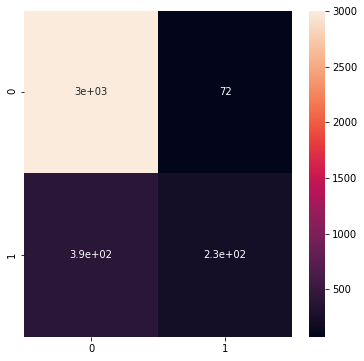

In [557]:
cm = confusion_matrix(y_test, lr_y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> Decision Tree <B>

In [558]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [559]:
dt_y_pred = dt.predict(X_test)
dt_y_pred1 = dt.predict(X_train)

In [560]:
print(accuracy_score(y_test, dt_y_pred))
print(accuracy_score(y_train,dt_y_pred1))
print(recall_score(y_test,dt_y_pred, average = 'weighted'))
print(precision_score(y_test,dt_y_pred, average = 'weighted'))
print(f1_score(y_test,dt_y_pred, average = 'weighted'))

0.8567180319005137
1.0
0.8567180319005137
0.8541995923755976
0.8553928859507183


In [561]:
cm = confusion_matrix(y_test, dt_y_pred)
calculateScore_DT(cm)
Model.append('Decission Tree')
Accuracy.append(accuracy_score(y_test,dt_y_pred))
F1Score.append(f1_score(y_test,dt_y_pred))
Model_DT.append('Decission Tree')
Accuracy_DT.append(accuracy_score(y_test, dt_y_pred))
F1Score_DT.append(f1_score(y_test,dt_y_pred))

In [562]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.5514469453376206 0.9184270393240169


In [563]:
print(classification_report(y_test,dt_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3077
           1       0.58      0.55      0.56       622

    accuracy                           0.86      3699
   macro avg       0.74      0.73      0.74      3699
weighted avg       0.85      0.86      0.86      3699



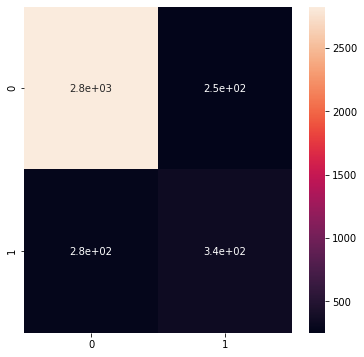

In [564]:
cm = confusion_matrix(y_test, dt_y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> KNN <B>

In [565]:
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [566]:
knn_y_pred = knn.predict(X_test)
knn_y_pred1 = knn.predict(X_train)

In [567]:
print(accuracy_score(y_test, knn_y_pred))
print(accuracy_score(y_train,knn_y_pred1))
print(recall_score(y_test,knn_y_pred, average = 'weighted'))
print(precision_score(y_test,knn_y_pred, average = 'weighted'))
print(f1_score(y_test,knn_y_pred, average = 'weighted'))

0.8613138686131386
0.9039508747537944
0.8613138686131386
0.8442461583615469
0.8411779943089751


In [568]:
cm = confusion_matrix(y_test, knn_y_pred)
calculateScore_KNN(cm)
Model_KNN.append('KNN')
Accuracy_KNN.append(accuracy_score(y_test, knn_y_pred))
F1Score_KNN.append(f1_score(y_test,knn_y_pred))

In [569]:
Model.append('KNN')
Accuracy.append(accuracy_score(y_test,knn_y_pred))
F1Score.append(f1_score(y_test,knn_y_pred))

In [570]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [571]:
sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.33440514469453375 0.9678258043548911


In [572]:
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3077
           1       0.68      0.33      0.45       622

    accuracy                           0.86      3699
   macro avg       0.78      0.65      0.68      3699
weighted avg       0.84      0.86      0.84      3699



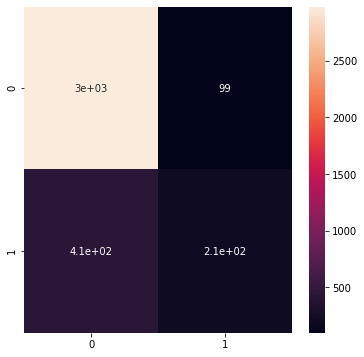

In [573]:
cm = confusion_matrix(y_test, knn_y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> Naive Bayes <B>

In [574]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [575]:
nb_y_pred = nb.predict(X_test)
nb_y_pred1 = nb.predict(X_train)

In [576]:
print(accuracy_score(y_test, nb_y_pred))
print(accuracy_score(y_train,nb_y_pred1))
print(recall_score(y_test,nb_y_pred, average = 'weighted'))
print(precision_score(y_test,nb_y_pred, average = 'weighted'))
print(f1_score(y_test,nb_y_pred, average = 'weighted'))

0.6991078669910786
0.7112733171127331
0.6991078669910786
0.845644475387525
0.7363928322812727


In [577]:
cm = confusion_matrix(y_test, nb_y_pred)
calculateScore_NB(cm)
Model_NB.append('Naive Bayes')
Accuracy_NB.append(accuracy_score(y_test, nb_y_pred))
F1Score_NB.append(f1_score(y_test,nb_y_pred))

In [578]:
Model.append('Naive Bayes')
Accuracy.append(accuracy_score(y_test,nb_y_pred))
F1Score.append(f1_score(y_test,nb_y_pred))

In [579]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.8183279742765274 0.6750081247968801


In [580]:
print(classification_report(y_test,nb_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79      3077
           1       0.34      0.82      0.48       622

    accuracy                           0.70      3699
   macro avg       0.64      0.75      0.63      3699
weighted avg       0.85      0.70      0.74      3699



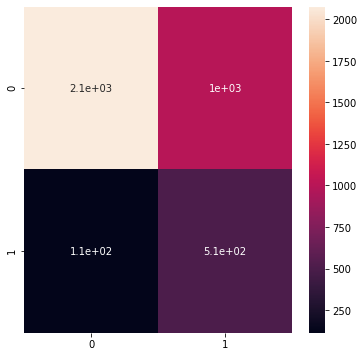

In [581]:
cm = confusion_matrix(y_test, nb_y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

In [582]:
result_base_data = pd.DataFrame({'Model':Model,
                      'Accuracy':Accuracy,
                      'F1Score':F1Score,
                      })
result_base_data

,Model,Accuracy,F1Score
0,Logistic Regression_KB,0.846445,0.622340
1,Decission Tree_KB,0.846445,0.579259
2,KNN_KB,0.795891,0.538226
3,Naive Bayes_KB,0.532036,0.393695
4,XGBoost_KB,0.882941,0.655529
5,Logistic Regression,0.874290,0.496208
6,Decission Tree,0.856718,0.564145
7,KNN,0.861314,0.447793
8,Naive Bayes,0.699108,0.477710


# <B> Models After Feature Selection Techniques <B>

In [583]:
columns =['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Browser',
       'Month_Dec', 'Month_Feb', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_Returning_Visitor', 'Weekend_n']    

In [584]:
X = OSHIX_n_scaled[columns]
y = OSHIy.Revenue

In [585]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
#checking the shapes 
print("shape of xtrain:",X_train.shape) 
print("shape of xtest:", X_test.shape) 
print("shape of ytrain:",y_train.shape)
print("shape of ytest:", y_test.shape)

shape of xtrain: (8631, 21)
shape of xtest: (3699, 21)
shape of ytrain: (8631,)
shape of ytest: (3699,)


### <B> Imbalance treatment for Kbest features <B>

In [586]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=33)
X_train_Balance, y_train_balance = sm.fit_sample(X_train, y_train.ravel())
X_train_Balance=pd.DataFrame(X_train_Balance)
X_train_Balance.columns = columns
y_train_balance =pd.DataFrame(y_train_balance)
y_train_balance.columns = ['Revenue']

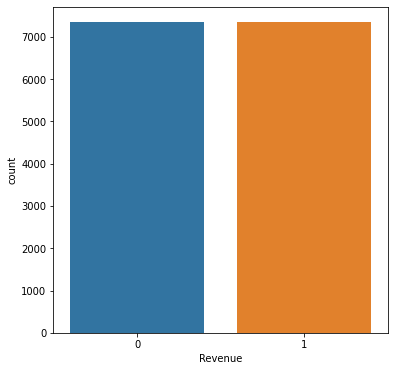

In [587]:
sns.countplot(x="Revenue", data = y_train_balance)

In [588]:
Model = []
Accuracy = []
F1Score = []
Sen = []
Spe = []
FPR = []
FNR = []

### <B> Logistic Regression <B>

In [589]:
lr = LogisticRegression()
lr.fit(X_train_Balance, y_train_balance)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [590]:
train_pred_sm = lr.predict(X_train_Balance)
test_pred_sm = lr.predict(X_test)

In [591]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.8464449851311165
0.8321987746766508
0.752411575562701
0.5306122448979592
0.6223404255319149


In [592]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_LR(cm)
print(cm)

[[2663  414]
 [ 154  468]]


In [593]:
Model_LR.append('Logistic Regression_KB')
Accuracy_LR.append(accuracy_score(y_test, test_pred_sm))
F1Score_LR.append(f1_score(y_test,test_pred_sm))

In [594]:
Model.append('Logistic Regression_KB')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [595]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [596]:
sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.752411575562701 0.8654533636659083


In [597]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.95      0.87      0.90      3077
           1       0.53      0.75      0.62       622

    accuracy                           0.85      3699
   macro avg       0.74      0.81      0.76      3699
weighted avg       0.88      0.85      0.86      3699



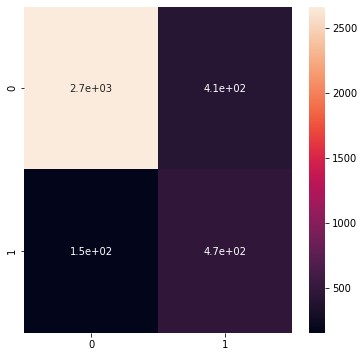

In [598]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> Decision Tree <B>

In [599]:
dt = DecisionTreeClassifier()
dt.fit(X_train_Balance, y_train_balance)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [600]:
train_pred_sm = dt.predict(X_train_Balance)
test_pred_sm = dt.predict(X_test)

In [601]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.849418761827521
0.999931926480599
0.6446945337620579
0.5440976933514247
0.590139808682855


In [602]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_DT(cm)
Model.append('Decission Tree_KB')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))
Model_DT.append('Decission Tree_KB')
Accuracy_DT.append(accuracy_score(y_test, test_pred_sm))
F1Score_DT.append(f1_score(y_test,test_pred_sm))

In [603]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [604]:
sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.6446945337620579 0.8908027299317517


In [605]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3077
           1       0.54      0.64      0.59       622

    accuracy                           0.85      3699
   macro avg       0.73      0.77      0.75      3699
weighted avg       0.86      0.85      0.85      3699



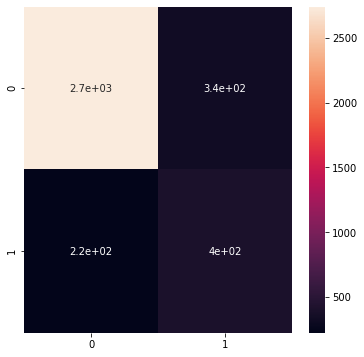

In [606]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> KNN <B>

In [607]:
knn= KNeighborsClassifier()
knn.fit(X_train_Balance, y_train_balance)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [608]:
train_pred_sm = knn.predict(X_train_Balance)
test_pred_sm = knn.predict(X_test)

In [609]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.7958907812922411
0.9309053778080327
0.707395498392283
0.43435340572556763
0.5382262996941897


In [610]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_KNN(cm)
Model_KNN.append('KNN_KB')
Accuracy_KNN.append(accuracy_score(y_test, test_pred_sm))
F1Score_KNN.append(f1_score(y_test,test_pred_sm))

In [611]:
Model.append('KNN_KB')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [612]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.707395498392283 0.8137796555086123


In [613]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      3077
           1       0.43      0.71      0.54       622

    accuracy                           0.80      3699
   macro avg       0.68      0.76      0.70      3699
weighted avg       0.85      0.80      0.81      3699



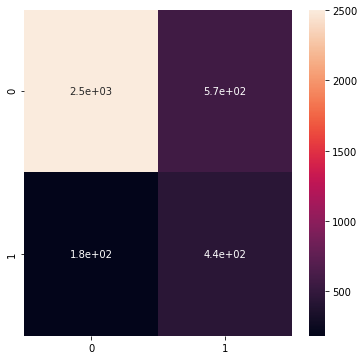

In [614]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> Naive Bayes <B>

In [615]:
nb = GaussianNB()
nb.fit(X_train_Balance, y_train_balance)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [616]:
train_pred_sm = nb.predict(X_train_Balance)
test_pred_sm = nb.predict(X_test)

In [617]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.5320356853203568
0.6958475153165419
0.9035369774919614
0.251679355127631
0.39369527145359023


In [618]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_NB(cm)
Model_NB.append('Naive Bayes_KB')
Accuracy_NB.append(accuracy_score(y_test, test_pred_sm))
F1Score_NB.append(f1_score(y_test,test_pred_sm))

In [619]:
Model.append('Naive Bayes_KB')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [620]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.9035369774919614 0.4569385765355866


In [621]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.96      0.46      0.62      3077
           1       0.25      0.90      0.39       622

    accuracy                           0.53      3699
   macro avg       0.61      0.68      0.51      3699
weighted avg       0.84      0.53      0.58      3699



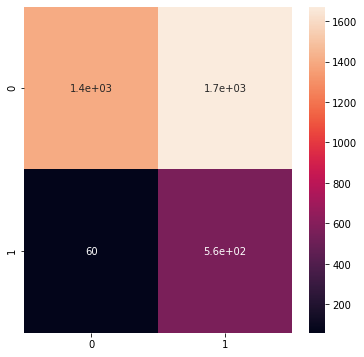

In [622]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> XGBoost<B>

In [623]:
xg = xgboost.XGBClassifier()
xg.fit(X_train_Balance, y_train_balance)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [624]:
train_pred_sm = xg.predict(X_train_Balance)
test_pred_sm = xg.predict(X_test)

In [625]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.88294133549608
0.9868618107556161
0.662379421221865
0.6488188976377953
0.6555290373906126


In [626]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_XG(cm)
Model_XG.append('XGBoost_KB')
Accuracy_XG.append(accuracy_score(y_test, test_pred_sm))
F1Score_XG.append(f1_score(y_test,test_pred_sm))

In [627]:
Model.append('XGBoost_KB')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [628]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.662379421221865 0.9275268118297043


In [629]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3077
           1       0.65      0.66      0.66       622

    accuracy                           0.88      3699
   macro avg       0.79      0.79      0.79      3699
weighted avg       0.88      0.88      0.88      3699



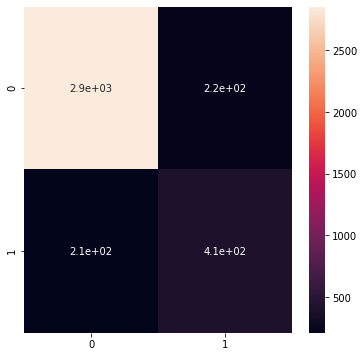

In [630]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

In [631]:
result_KBest = pd.DataFrame({'Model':Model,'Accuracy':Accuracy,'F1Score':F1Score})
result_KBest

,Model,Accuracy,F1Score
0,Logistic Regression_KB,0.846445,0.622340
1,Decission Tree_KB,0.849419,0.590140
2,KNN_KB,0.795891,0.538226
3,Naive Bayes_KB,0.532036,0.393695
4,XGBoost_KB,0.882941,0.655529


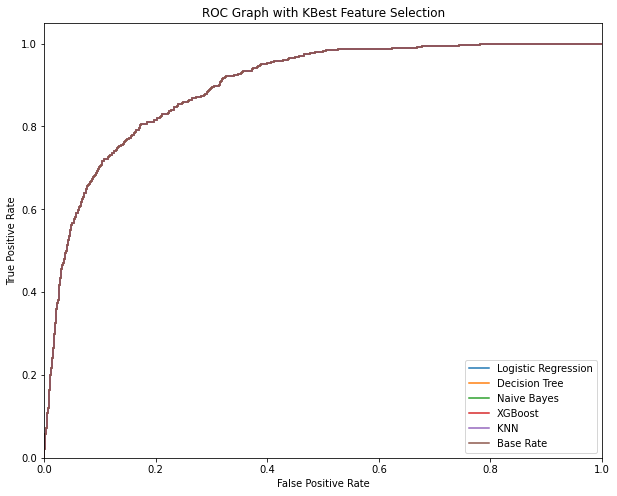

In [544]:
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xg.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure(figsize = (10, 8))
plt.plot(fpr,tpr, label="Logistic Regression")
plt.plot(fpr,tpr, label="Decision Tree")
plt.plot(fpr,tpr, label="Naive Bayes")
plt.plot(fpr,tpr, label="XGBoost")
plt.plot(fpr,tpr, label="KNN")
plt.plot(fpr,tpr, label="Base Rate")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph with KBest Feature Selection')
plt.legend(loc = "lower right")
plt.show()

### <B> VIF <B>

In [632]:
columns =['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay', 'Browser', 'Region', 'TrafficType',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'Weekend_n'] 

In [633]:
X = OSHIX_n_scaled[columns]
y = OSHIy.Revenue

In [634]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
#checking the shapes 
print("shape of xtrain:",X_train.shape) 
print("shape of xtest:", X_test.shape) 
print("shape of ytrain:",y_train.shape)
print("shape of ytest:", y_test.shape)

shape of xtrain: (8631, 22)
shape of xtest: (3699, 22)
shape of ytrain: (8631,)
shape of ytest: (3699,)


### <B> Imbalance treatment for Kbest features <B>

In [635]:
sm = SMOTE(random_state=33)
X_train_Balance, y_train_balance = sm.fit_sample(X_train, y_train.ravel())
X_train_Balance=pd.DataFrame(X_train_Balance)
X_train_Balance.columns = columns
y_train_balance =pd.DataFrame(y_train_balance)
y_train_balance.columns = ['Revenue']

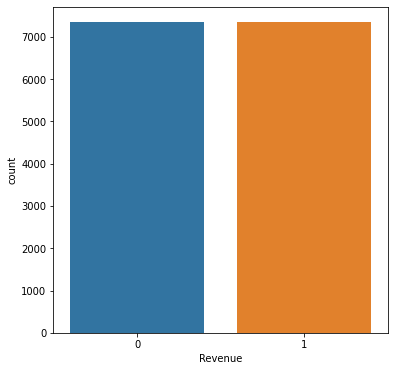

In [636]:
sns.countplot(x="Revenue", data = y_train_balance)

In [637]:
Model = []
Accuracy = []
F1Score = []
Sen = []
Spe = []
FPR = []
FNR = []

### <B> Logistic Regression <B>

In [638]:
lr = LogisticRegression()
lr.fit(X_train_Balance, y_train_balance)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [639]:
train_pred_sm = lr.predict(X_train_Balance)
test_pred_sm = lr.predict(X_test)

In [640]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.8591511219248446
0.8382573179033356
0.72508038585209
0.5630461922596754
0.6338721011946592


In [641]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_LR(cm)
print(cm)
Model_LR.append('Logistic Regression_VIF')
Accuracy_LR.append(accuracy_score(y_test, test_pred_sm))
F1Score_LR.append(f1_score(y_test,test_pred_sm))

[[2727  350]
 [ 171  451]]


In [642]:
Model.append('Logistic Regression_VIF')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [643]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.72508038585209 0.886252843678908


In [644]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3077
           1       0.56      0.73      0.63       622

    accuracy                           0.86      3699
   macro avg       0.75      0.81      0.77      3699
weighted avg       0.88      0.86      0.87      3699



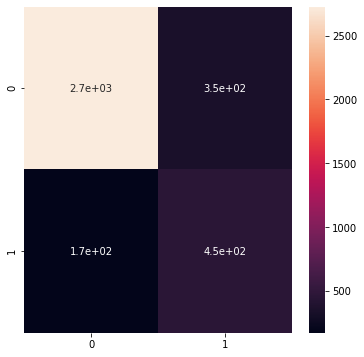

In [645]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> Decision Tree <B>

In [646]:
dt = DecisionTreeClassifier()
dt.fit(X_train_Balance, y_train_balance)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [647]:
train_pred_sm = dt.predict(X_train_Balance)
test_pred_sm = dt.predict(X_test)

In [648]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.8496891051635577
1.0
0.662379421221865
0.5435356200527705
0.5971014492753624


In [649]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_DT(cm)
Model.append('Decission Tree_VIF')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [650]:
Model_DT.append('Decission Tree_VIF')
Accuracy_DT.append(accuracy_score(y_test, test_pred_sm))
F1Score_DT.append(f1_score(y_test,test_pred_sm))

In [651]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [652]:
sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.662379421221865 0.8875528111797205


In [653]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3077
           1       0.54      0.66      0.60       622

    accuracy                           0.85      3699
   macro avg       0.74      0.77      0.75      3699
weighted avg       0.86      0.85      0.86      3699



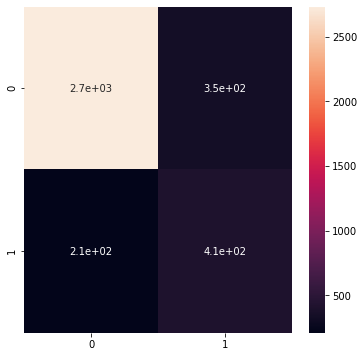

In [654]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> KNN <B>

In [655]:
knn= KNeighborsClassifier()
knn.fit(X_train_Balance, y_train_balance)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [656]:
train_pred_sm = knn.predict(X_train_Balance)
test_pred_sm = knn.predict(X_test)

In [657]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.7918356312516897
0.9270251872021783
0.7009646302250804
0.42745098039215684
0.5310596833130329


In [658]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_KNN(cm)
Model_KNN.append('KNN_VIF')
Accuracy_KNN.append(accuracy_score(y_test, test_pred_sm))
F1Score_KNN.append(f1_score(y_test,test_pred_sm))

In [306]:
Model.append('KNN_VIF')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [659]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.7009646302250804 0.810204744881378


In [660]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      3077
           1       0.43      0.70      0.53       622

    accuracy                           0.79      3699
   macro avg       0.68      0.76      0.70      3699
weighted avg       0.85      0.79      0.81      3699



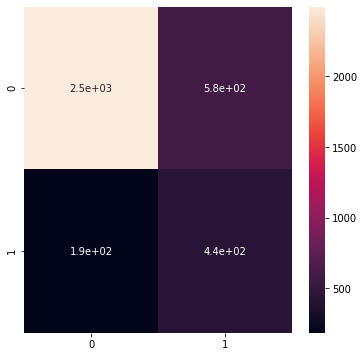

In [661]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> Naive Bayes <B>

In [662]:
nb = GaussianNB()
nb.fit(X_train_Balance, y_train_balance)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [663]:
train_pred_sm = nb.predict(X_train_Balance)
test_pred_sm = nb.predict(X_test)

In [664]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.5571776155717761
0.7102791014295439
0.905144694533762
0.26283846872082167
0.40738060781476126


In [665]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_NB(cm)
Model_NB.append('Naive Bayes_VIF')
Accuracy_NB.append(accuracy_score(y_test, test_pred_sm))
F1Score_NB.append(f1_score(y_test,test_pred_sm))

In [666]:
Model.append('Naive Bayes_VIF')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [667]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [668]:
sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.905144694533762 0.48683782905427364


In [669]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.96      0.49      0.65      3077
           1       0.26      0.91      0.41       622

    accuracy                           0.56      3699
   macro avg       0.61      0.70      0.53      3699
weighted avg       0.84      0.56      0.61      3699



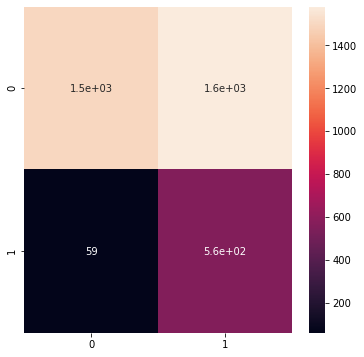

In [670]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> XGBOOST<B>

In [671]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [672]:
xg = xgboost.XGBClassifier()
xg.fit(X_train_Balance, y_train_balance)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [673]:
train_pred_sm = xg.predict(X_train_Balance)
test_pred_sm = xg.predict(X_test)

In [674]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.88294133549608
0.9861810755616065
0.6302250803858521
0.6588235294117647
0.6442070665571077


In [675]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_XG(cm)
Model_XG.append('XGBoost_VIF')
Accuracy_XG.append(accuracy_score(y_test, test_pred_sm))
F1Score_XG.append(f1_score(y_test,test_pred_sm))

In [676]:
Model.append('XGBoost_VIF')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [677]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [678]:
sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.6302250803858521 0.9340266493337667


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3077
           1       0.66      0.63      0.64       622

    accuracy                           0.88      3699
   macro avg       0.79      0.78      0.79      3699
weighted avg       0.88      0.88      0.88      3699



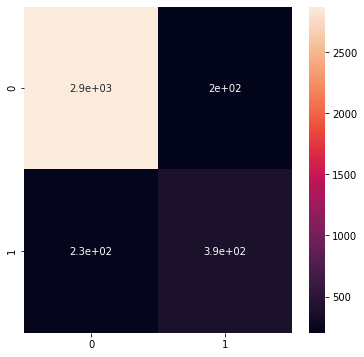

In [679]:
print(classification_report(y_test,test_pred_sm))
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

In [681]:
result_VIF = pd.DataFrame({'Model':Model,
                      'Accuracy':Accuracy,
                      'F1Score':F1Score,
                      })
result_VIF

,Model,Accuracy,F1Score
0,Logistic Regression_VIF,0.859151,0.633872
1,Decission Tree_VIF,0.849689,0.597101
2,Naive Bayes_VIF,0.557178,0.407381
3,XGBoost_VIF,0.882941,0.644207


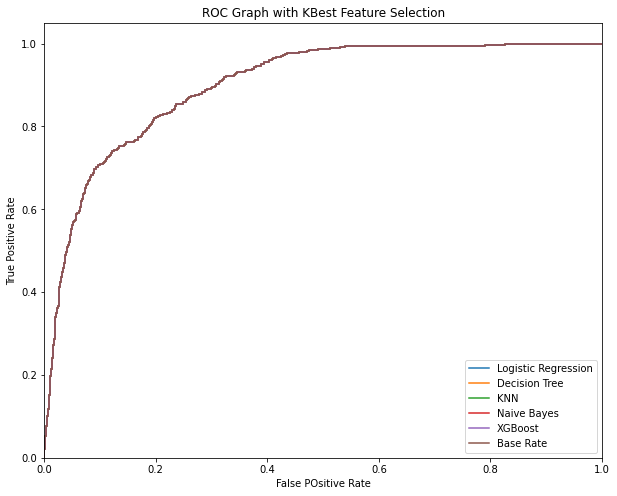

In [330]:
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
xg_fpr, xg_tpr, xg_thresholds = roc_curve(y_test, xg.predict_proba(X_test)[:,1])
plt.figure(figsize = (10, 8))
plt.plot(fpr,tpr, label="Logistic Regression")
plt.plot(fpr,tpr, label="Decision Tree")
plt.plot(fpr,tpr, label="KNN")
plt.plot(fpr,tpr, label="Naive Bayes")
plt.plot(fpr,tpr, label="XGBoost")
plt.plot(fpr,tpr, label="Base Rate")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False POsitive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph with KBest Feature Selection')
plt.legend(loc = "lower right")
plt.show()

### <B> Backward Elimination <B>

In [682]:
columns =['Informational', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'OperatingSystems', 'Browser', 'Month_Dec', 'Month_Feb', 'Month_Mar', 'Month_May', 'Month_Nov', 'VisitorType_Other', 'VisitorType_Returning_Visitor'] 

In [683]:
X = OSHIX_n_scaled[columns]
y = OSHIy.Revenue

In [684]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
#checking the shapes 
print("shape of xtrain:",X_train.shape) 
print("shape of xtest:", X_test.shape) 
print("shape of ytrain:",y_train.shape)
print("shape of ytest:", y_test.shape)

shape of xtrain: (8631, 15)
shape of xtest: (3699, 15)
shape of ytrain: (8631,)
shape of ytest: (3699,)


### <B> Imbalance treatment for Backward Elimination <B>

In [685]:
sm = SMOTE(random_state=33)
X_train_Balance, y_train_balance = sm.fit_sample(X_train, y_train.ravel())
X_train_Balance=pd.DataFrame(X_train_Balance)
X_train_Balance.columns = columns
y_train_balance =pd.DataFrame(y_train_balance)
y_train_balance.columns = ['Revenue']

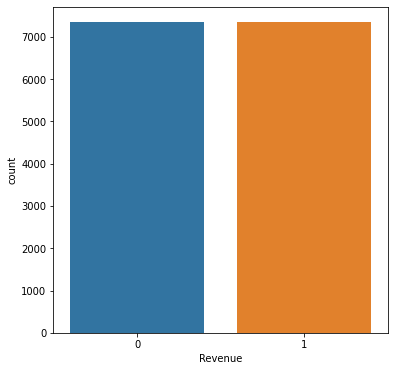

In [686]:
sns.countplot(x="Revenue", data = y_train_balance)

In [687]:
Model = []
Accuracy = []
F1Score = []
Sen = []
Spe = []
FPP = []
FNR = []

### <B> Logistic Regression <B>

In [736]:
lr = LogisticRegression()
lr.fit(X_train_Balance, y_train_balance)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [737]:
train_pred_sm = lr.predict(X_train_Balance)
test_pred_sm = lr.predict(X_test)

In [738]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.8475263584752636
0.8287270251872022
0.7540192926045016
0.5329545454545455
0.6245006657789614


In [739]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_LR(cm)
print(cm)
Model_LR.append('Logistic Regression_BE')
Accuracy_LR.append(accuracy_score(y_test, test_pred_sm))
F1Score_LR.append(f1_score(y_test,test_pred_sm))

[[2666  411]
 [ 153  469]]


In [740]:
Model.append('Logistic Regression_BE')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [741]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.7540192926045016 0.8664283392915177


In [742]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.95      0.87      0.90      3077
           1       0.53      0.75      0.62       622

    accuracy                           0.85      3699
   macro avg       0.74      0.81      0.76      3699
weighted avg       0.88      0.85      0.86      3699



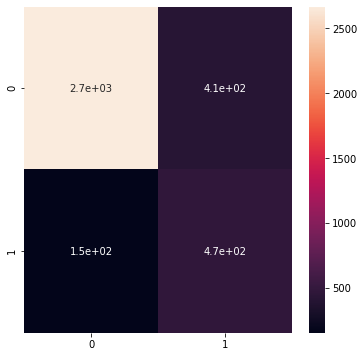

In [743]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> Decision Tree <B>

In [744]:
dt = DecisionTreeClassifier()
dt.fit(X_train_Balance, y_train_balance)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [745]:
train_pred_sm = dt.predict(X_train_Balance)
test_pred_sm = dt.predict(X_test)

In [746]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.8513111651797783
0.9998638529611981
0.657556270096463
0.5482573726541555
0.597953216374269


In [747]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_DT(cm)
Model.append('Decission Tree_BE')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [748]:
Model_DT.append('Decission Tree_BE')
Accuracy_DT.append(accuracy_score(y_test, test_pred_sm))
F1Score_DT.append(f1_score(y_test,test_pred_sm))

In [749]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [750]:
sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.657556270096463 0.8904777380565486


In [751]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3077
           1       0.55      0.66      0.60       622

    accuracy                           0.85      3699
   macro avg       0.74      0.77      0.75      3699
weighted avg       0.86      0.85      0.86      3699



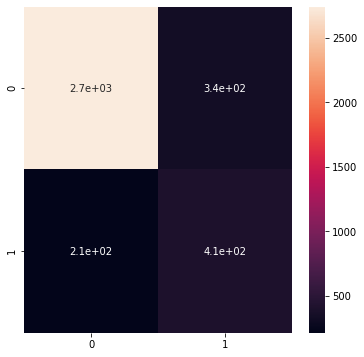

In [752]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> KNN <B>

In [753]:
knn= KNeighborsClassifier()
knn.fit(X_train_Balance, y_train_balance)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [754]:
train_pred_sm = knn.predict(X_train_Balance)
test_pred_sm = knn.predict(X_test)

In [755]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.8150851581508516
0.9301565690946222
0.729903536977492
0.46804123711340206
0.5703517587939698


In [756]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_KNN(cm)
Model_KNN.append('KNN_BE')
Accuracy_KNN.append(accuracy_score(y_test, test_pred_sm))
F1Score_KNN.append(f1_score(y_test,test_pred_sm))

In [757]:
Model.append('KNN_BE')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [758]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [759]:
sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.729903536977492 0.8323041923951902


In [760]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      3077
           1       0.47      0.73      0.57       622

    accuracy                           0.82      3699
   macro avg       0.70      0.78      0.73      3699
weighted avg       0.86      0.82      0.83      3699



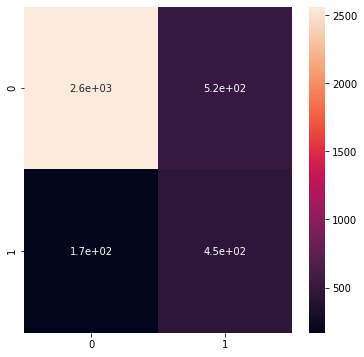

In [761]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> Naive Bayes <B>

In [762]:
nb = GaussianNB()
nb.fit(X_train_Balance, y_train_balance)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [763]:
train_pred_sm = nb.predict(X_train_Balance)
test_pred_sm = nb.predict(X_test)

In [764]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.5279805352798054
0.7002042205582029
0.9244372990353698
0.25285839929639403
0.3970994475138122


In [765]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_NB(cm)
Model_NB.append('Naive Bayes_BE')
Accuracy_NB.append(accuracy_score(y_test, test_pred_sm))
F1Score_NB.append(f1_score(y_test,test_pred_sm))

In [766]:
Model.append('Naive Bayes_BE')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [767]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [768]:
sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.9244372990353698 0.44783880402989923


In [769]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61      3077
           1       0.25      0.92      0.40       622

    accuracy                           0.53      3699
   macro avg       0.61      0.69      0.50      3699
weighted avg       0.85      0.53      0.58      3699



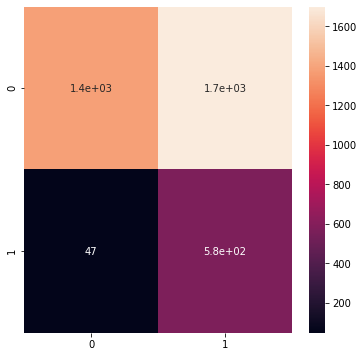

In [770]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> XGBOOST<B>

In [771]:
xg = xgboost.XGBClassifier()
xg.fit(X_train_Balance, y_train_balance)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [772]:
train_pred_sm = xg.predict(X_train_Balance)
test_pred_sm = xg.predict(X_test)

In [773]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.8802379021357124
0.9754254594962559
0.7090032154340836
0.6273115220483642
0.6656603773584906


In [774]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_XG(cm)
Model_XG.append('XGBoost_BE')
Accuracy_XG.append(accuracy_score(y_test, test_pred_sm))
F1Score_XG.append(f1_score(y_test,test_pred_sm))

In [775]:
Model.append('XGBoost_BE')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [776]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [777]:
sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.7090032154340836 0.9148521286967826


In [778]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3077
           1       0.63      0.71      0.67       622

    accuracy                           0.88      3699
   macro avg       0.78      0.81      0.80      3699
weighted avg       0.89      0.88      0.88      3699



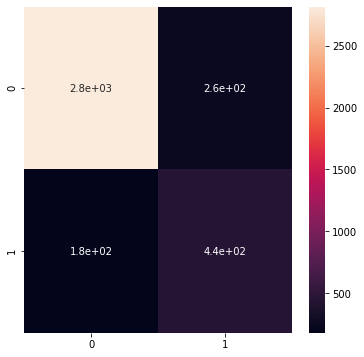

In [779]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

In [780]:
result_BE = pd.DataFrame({'Model':Model,
                      'Accuracy':Accuracy,
                      'F1Score':F1Score,
                       })
result_BE

,Model,Accuracy,F1Score
0,Logistic Regression_KB,0.847526,0.624501
1,Decission Tree_KB,0.852393,0.600293
2,KNN_KB,0.815085,0.570352
3,Naive Bayes_KB,0.527981,0.397099
4,XGBoost_KB,0.880238,0.665660
5,Logistic Regression_BE,0.847526,0.624501
6,Decission Tree_BE,0.851311,0.597953
7,KNN_BE,0.815085,0.570352
8,Naive Bayes_BE,0.527981,0.397099
9,XGBoost_BE,0.880238,0.665660


### <B> Recursive Feature Elimination <B>

In [781]:
columns =['Informational', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_n'] 

In [782]:
X = OSHIX_n_scaled[columns]
y = OSHIy.Revenue

In [783]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
#checking the shapes 
print("shape of xtrain:",X_train.shape) 
print("shape of xtest:", X_test.shape) 
print("shape of ytrain:",y_train.shape)
print("shape of ytest:", y_test.shape)

shape of xtrain: (8631, 18)
shape of xtest: (3699, 18)
shape of ytrain: (8631,)
shape of ytest: (3699,)


### <B> Imbalance treatment for Recursive Feature Elimination <B>

In [784]:
sm = SMOTE(random_state=33)
X_train_Balance, y_train_balance = sm.fit_sample(X_train, y_train.ravel())
X_train_Balance=pd.DataFrame(X_train_Balance)
X_train_Balance.columns = columns
y_train_balance =pd.DataFrame(y_train_balance)
y_train_balance.columns = ['Revenue']

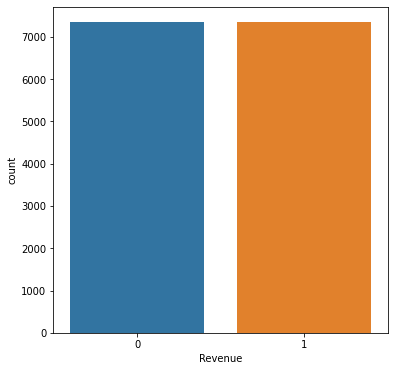

In [785]:
sns.countplot(x="Revenue", data = y_train_balance)

In [786]:
Model = []
Accuracy = []
F1Score = []
Sen = []
Spe = []
FPP = []
FNR = []

### <B> Logistic Regression <B>

In [787]:
lr = LogisticRegression()
lr.fit(X_train_Balance, y_train_balance)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [788]:
train_pred_sm = lr.predict(X_train_Balance)
test_pred_sm = lr.predict(X_test)

In [789]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.8286023249526899
0.8241660993873383
0.7508038585209004
0.49365750528541225
0.5956632653061223


In [790]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_LR(cm)
print(cm)
Model_LR.append('Logistic Regression_RFE')
Accuracy_LR.append(accuracy_score(y_test, test_pred_sm))
F1Score_LR.append(f1_score(y_test,test_pred_sm))

[[2598  479]
 [ 155  467]]


In [791]:
Model.append('Logistic Regression_RFE')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [792]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [793]:
sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.7508038585209004 0.8443288917777055


In [794]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      3077
           1       0.49      0.75      0.60       622

    accuracy                           0.83      3699
   macro avg       0.72      0.80      0.74      3699
weighted avg       0.87      0.83      0.84      3699



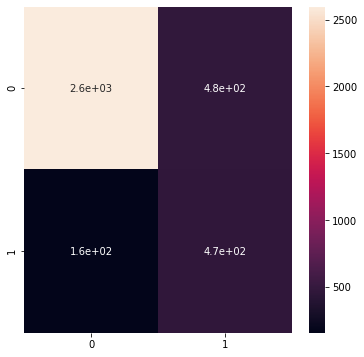

In [795]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> Decision Tree <B>

In [796]:
dt = DecisionTreeClassifier()
dt.fit(X_train_Balance, y_train_balance)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [797]:
train_pred_sm = dt.predict(X_train_Balance)
test_pred_sm = dt.predict(X_test)

In [798]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.8315761016490943
0.99857045609258
0.6334405144694534
0.49936628643852976
0.5584691708008505


In [799]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_DT(cm)
Model.append('Decission Tree_RFE')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [800]:
Model_DT.append('Decission Tree_RFE')
Accuracy_DT.append(accuracy_score(y_test, test_pred_sm))
F1Score_DT.append(f1_score(y_test,test_pred_sm))

In [801]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [802]:
sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.6334405144694534 0.8716282092947676


In [803]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      3077
           1       0.50      0.63      0.56       622

    accuracy                           0.83      3699
   macro avg       0.71      0.75      0.73      3699
weighted avg       0.85      0.83      0.84      3699



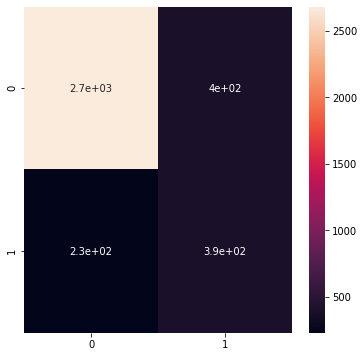

In [804]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> KNN <B>

In [805]:
knn= KNeighborsClassifier()
knn.fit(X_train_Balance, y_train_balance)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [806]:
train_pred_sm = knn.predict(X_train_Balance)
test_pred_sm = knn.predict(X_test)

In [807]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.8123817247904839
0.9247787610619469
0.6704180064308681
0.4602649006622517
0.5458115183246073


In [808]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_KNN(cm)
Model_KNN.append('KNN_RFE')
Accuracy_KNN.append(accuracy_score(y_test, test_pred_sm))
F1Score_KNN.append(f1_score(y_test,test_pred_sm))

In [809]:
Model.append('KNN_RFE')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [810]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [811]:
sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.6704180064308681 0.8410789730256744


In [812]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      3077
           1       0.46      0.67      0.55       622

    accuracy                           0.81      3699
   macro avg       0.69      0.76      0.71      3699
weighted avg       0.85      0.81      0.83      3699



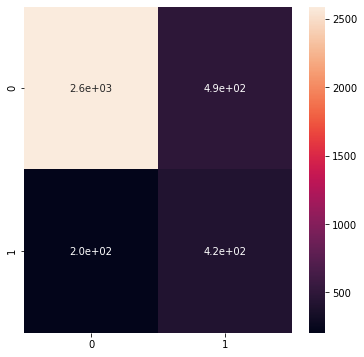

In [813]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> Naive Bayes <B>

In [814]:
nb = GaussianNB()
nb.fit(X_train_Balance, y_train_balance)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [815]:
train_pred_sm = nb.predict(X_train_Balance)
test_pred_sm = nb.predict(X_test)

In [816]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.4847256015139227
0.6648059904697072
0.9212218649517685
0.23580246913580247
0.37549148099606816


In [817]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_NB(cm)
Model_NB.append('Naive Bayes_RFE')
Accuracy_NB.append(accuracy_score(y_test, test_pred_sm))
F1Score_NB.append(f1_score(y_test,test_pred_sm))

In [818]:
Model.append('Naive Bayes_RFE')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [819]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [820]:
sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.9212218649517685 0.3964900877478063


In [821]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.96      0.40      0.56      3077
           1       0.24      0.92      0.38       622

    accuracy                           0.48      3699
   macro avg       0.60      0.66      0.47      3699
weighted avg       0.84      0.48      0.53      3699



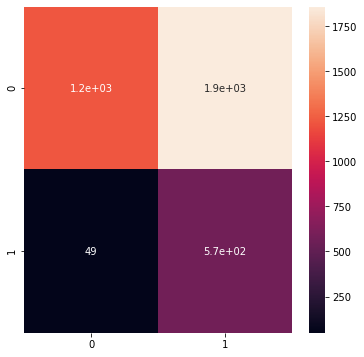

In [822]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

### <B> XGBOOST<B>

In [823]:
xg = xgboost.XGBClassifier()
xg.fit(X_train_Balance, y_train_balance)

/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sepideh/.local/share/virtualenvs/Capstone_python-WWuw0U2X/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [824]:
train_pred_sm = xg.predict(X_train_Balance)
test_pred_sm = xg.predict(X_test)

In [825]:
print(accuracy_score(y_test, test_pred_sm))
print(accuracy_score(y_train_balance,train_pred_sm))
print(recall_score(y_test,test_pred_sm))
print(precision_score(y_test,test_pred_sm))
print(f1_score(y_test,test_pred_sm))

0.8637469586374696
0.956501021102791
0.7106109324758842
0.577023498694517
0.6368876080691642


In [826]:
cm = confusion_matrix(y_test, test_pred_sm)
calculateScore_XG(cm)
Model_XG.append('XGBoost_RFE')
Accuracy_XG.append(accuracy_score(y_test, test_pred_sm))
F1Score_XG.append(f1_score(y_test,test_pred_sm))

In [827]:
Model.append('XGBoost_RFE')
Accuracy.append(accuracy_score(y_test,test_pred_sm))
F1Score.append(f1_score(y_test,test_pred_sm))

In [828]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [829]:
sensetivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensetivity, specificity)

0.7106109324758842 0.8947026324341891


In [830]:
print(classification_report(y_test,test_pred_sm))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      3077
           1       0.58      0.71      0.64       622

    accuracy                           0.86      3699
   macro avg       0.76      0.80      0.78      3699
weighted avg       0.88      0.86      0.87      3699



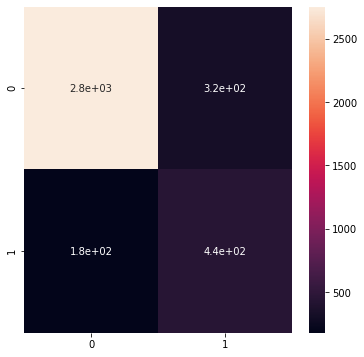

In [831]:
cm = confusion_matrix(y_test, test_pred_sm)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True)

In [832]:
result3 = pd.DataFrame({'Model':Model,
                      'Accuracy':Accuracy,
                      'F1Score':F1Score,
                       })
result3

,Model,Accuracy,F1Score
0,Logistic Regression_RFE,0.828602,0.595663
1,Decission Tree_RFE,0.831576,0.558469
2,KNN_RFE,0.812382,0.545812
3,Naive Bayes_RFE,0.484726,0.375491
4,XGBoost_RFE,0.863747,0.636888
